In [5]:

import numpy as np
from matplotlib import pyplot as plt
from sqlalchemy.dialects.mssql.information_schema import columns

import sys
import os
sys.path.append(os.path.abspath(".."))

import importlib
import pandas as pd

import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import volpy_func_ticker_lib as vtp

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(vtp)


<module 'volpy_func_ticker_lib' from 'D:\\Professionelt\\Code\\volpy\\volpy_func_ticker_lib.py'>

In [6]:
importlib.reload(vp)
orpy = vtp.concat_ticker_datasets(["SPX"], "orpy")

orpy["r_30_SW_day_scaled_full"] = orpy["CF_30_SW_day"] / orpy["SW_m1_29"]

sgy_names = ["call_ATM", "put_OTM_15%", "straddle", "strangle_5%", "strangle_15%", "butterfly_spread_15%", "condor_strangle_5%_15%", "full_stacked_strangle"]

df_returns = vp.make_df_strats(orpy, sgy_common = "CF_D_30_", sgy_names = sgy_names, factors=[], ticker_list = ["SPX"], 
                               sign=True, scale=True, extra_scale_columns=["r_30_SW_day_scaled_full"],
                               plot = True, figsize=(10.5,6), lw = 0.6, fig_name = "", prefix = r"$\Delta$ ")

FileNotFoundError: [Errno 2] No such file or directory: 'data/factor_df.csv'

# Load Data

In [57]:
om_folder = "i2s1_full_v2" #SPX_full, i2s1_full_v2
sum_df, od_raw = vs.import_sum_raw(om_folder = om_folder)

KeyboardInterrupt: 

In [4]:
price_type = "mid"
IV_type = "om"
OTMs = [0.05, 0.15]

od_hl = vs.create_od_hl(od_raw = od_raw, sum_df = sum_df, price_type = price_type, IV_type = IV_type)
sum_df = vs.add_F_to_sum_df(od_hl = od_hl, sum_df = sum_df)
sum_df = vs.add_ATM_options_to_sum_df(sum_df = sum_df, od_hl = od_hl, od_raw = od_raw, OTMs = OTMs)

# Add strategy cashflows

In [5]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(orpy)
# importlib.reload(orpy_test)

curr_OTMs = OTMs
HL30_list = ["30"] # ["low", "high", "30"], ["30"]

df_orpy = sum_df.copy()
df_orpy = orpy.prepare_for_sgys(df_orpy, curr_OTMs)

Strategies = [orpy.add_put_and_call_sgy, orpy.add_straddle_strangle_sgy, orpy.add_butterfly_spread_sgy, orpy.add_condor_strangle_sgy, orpy.add_stacked_straddle_sgy, orpy.add_full_stacked_straddle_sgy, orpy.add_full_stacked_strangle_sgy]
for add_sgy in Strategies:
    df_orpy = add_sgy(df_orpy, curr_OTMs, HL30_list)

In [58]:
importlib.reload(vp)
df = vp.make_df_strats(df_orpy, sgy_common = "r_D_30_", sign=False, scale = False, plot = False, ticker_list=["SPX"], extra_columns = ["SW_0_30"]) #, sgy_names = None

In [41]:
((df["VIX"]**2).isna()).sum()

2

In [59]:
df = df[df["VIX"].isna()==False]
df = df[df["date"] < pd.Timestamp("2003-02-28")]

In [60]:
np.corrcoef(df["SW_0_30"], df["VIX"]**2)

array([[1.        , 0.99136225],
       [0.99136225, 1.        ]])

In [50]:
df["SW_0_30"].mean()

0.058677247252805535

In [51]:
(df["VIX"]**2).mean()

0.05967245882582081

In [52]:
df["SW_0_30"].std()

0.03244640728211724

In [53]:
(df["VIX"]**2).std()

0.031066016624353307

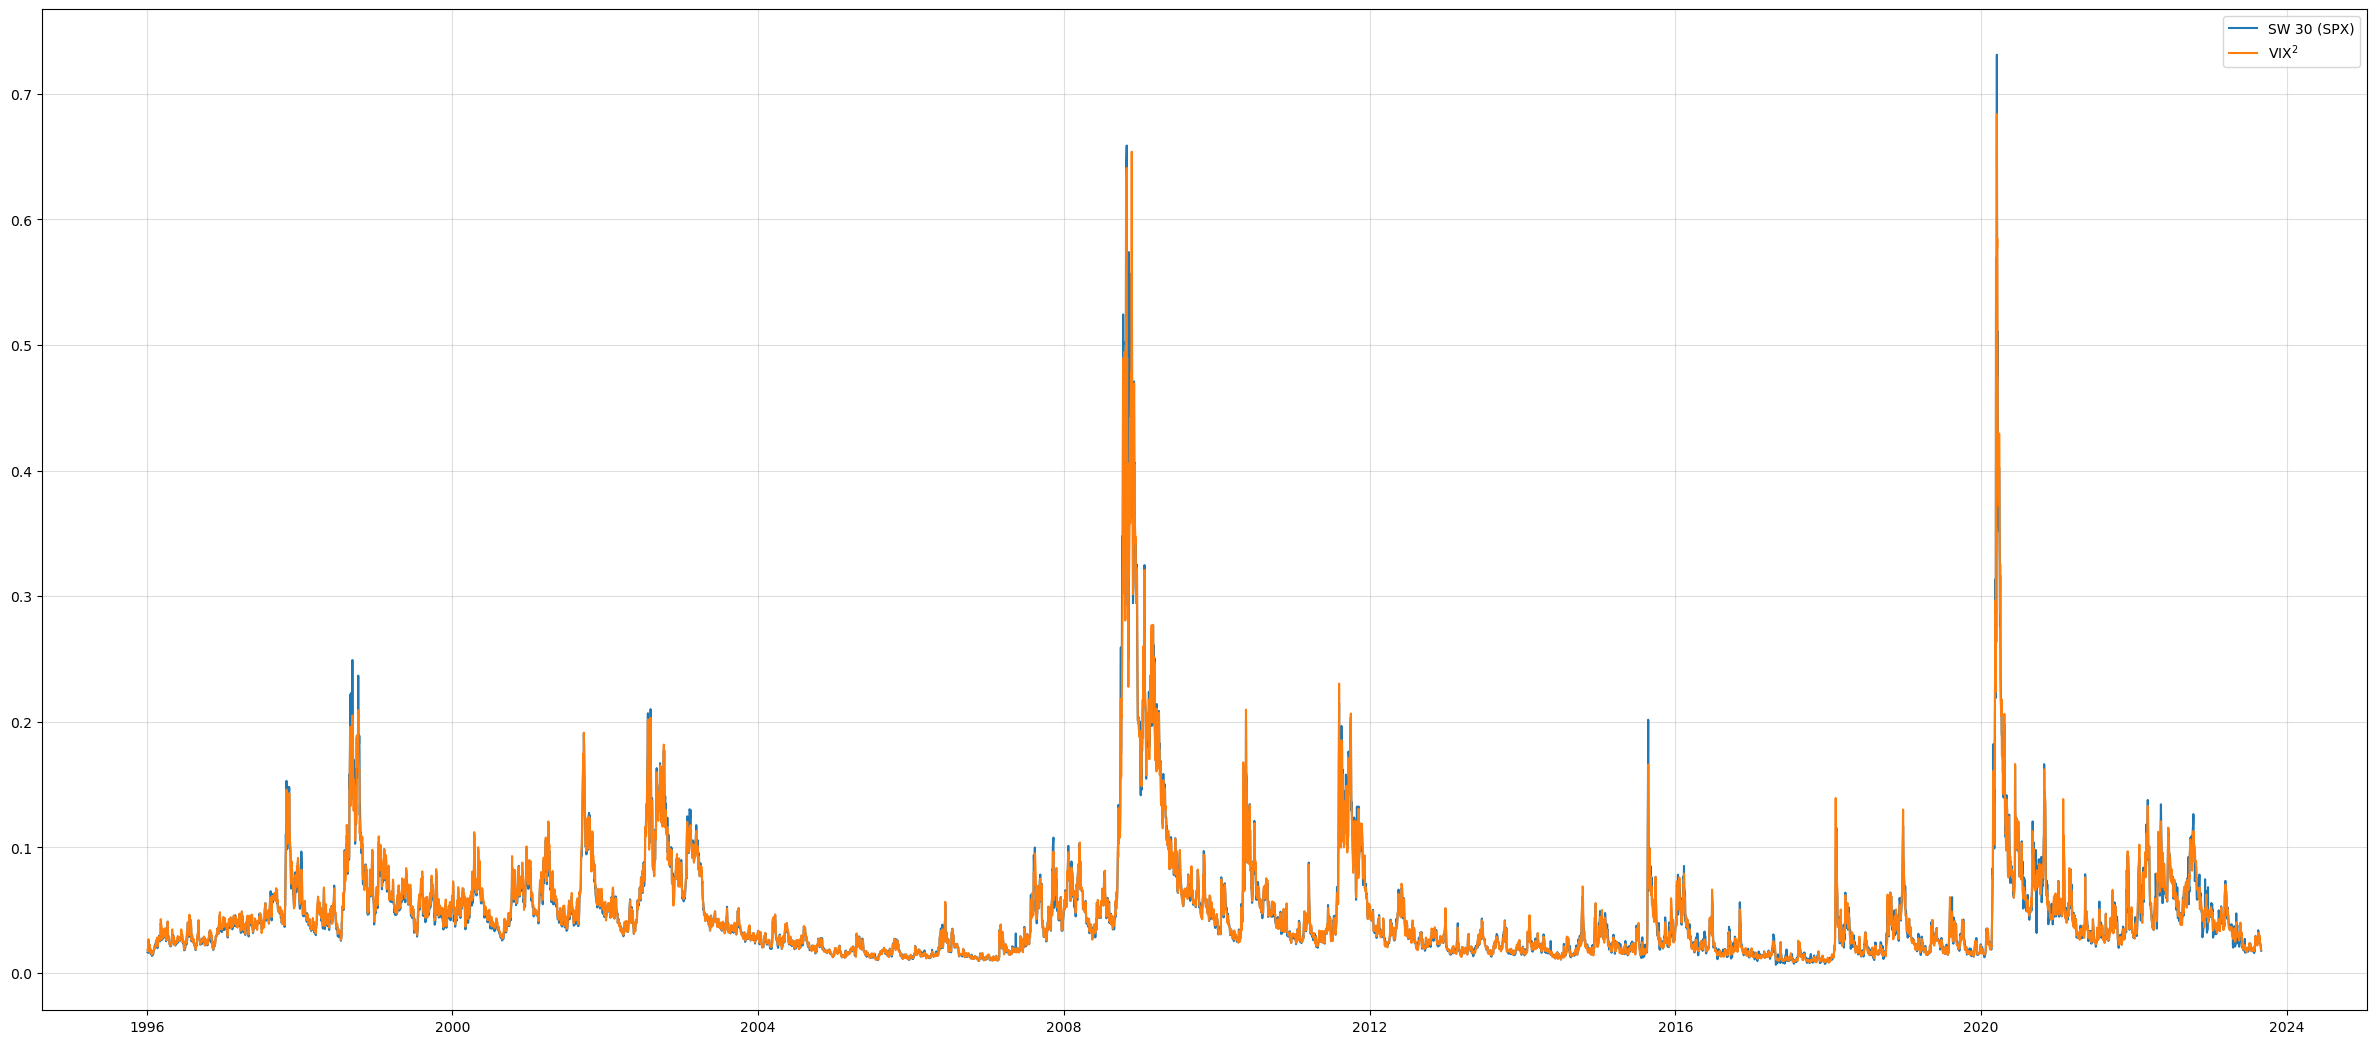

In [62]:
plt.figure(figsize=(30,13))
plt.plot(df["date"], df["SW_0_30"], label = "SW 30 (SPX)")
plt.plot(df["date"], df["VIX"]**2, label = r"VIX$^2$")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Select strategies, add factors and plot

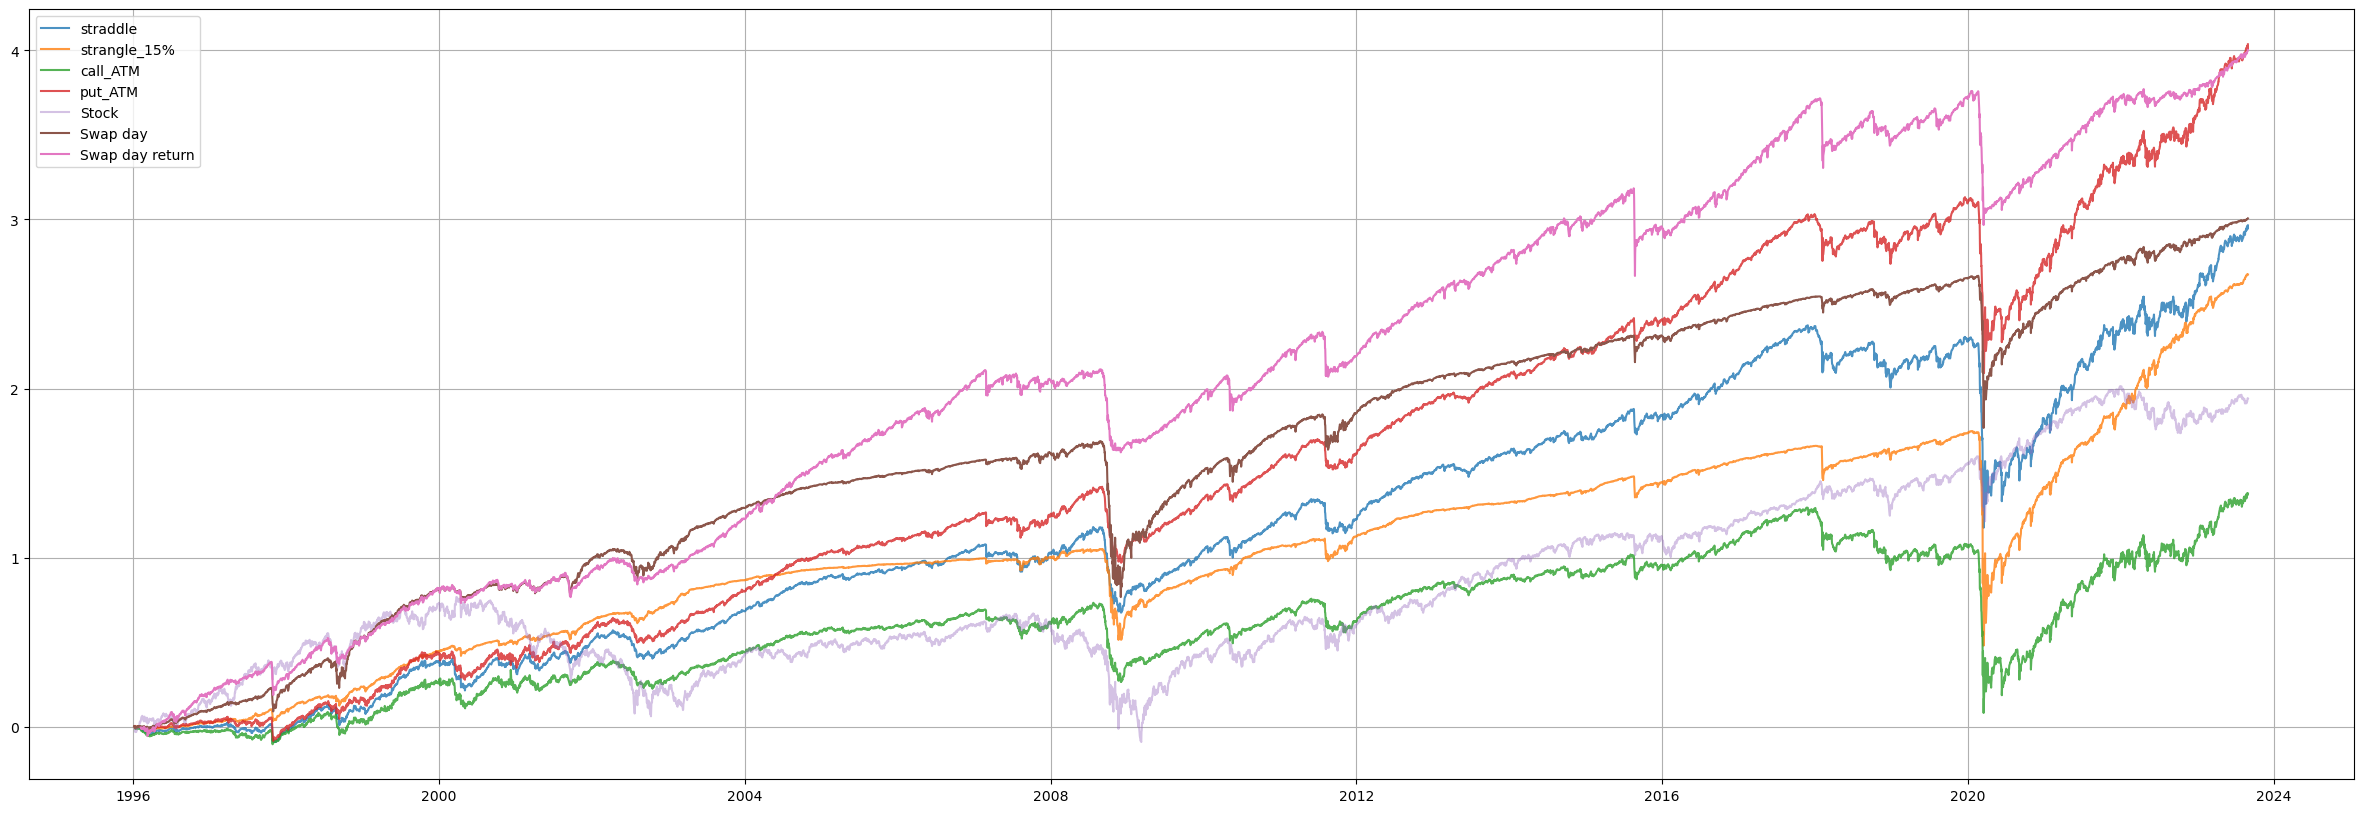

In [58]:
importlib.reload(vp)
df_returns = vp.make_df_strats(df_orpy, sgy_common = "CF_D_30_", sgy_names = ["straddle", "strangle_15%", "call_ATM", "put_ATM"], plot = True, factors=[])

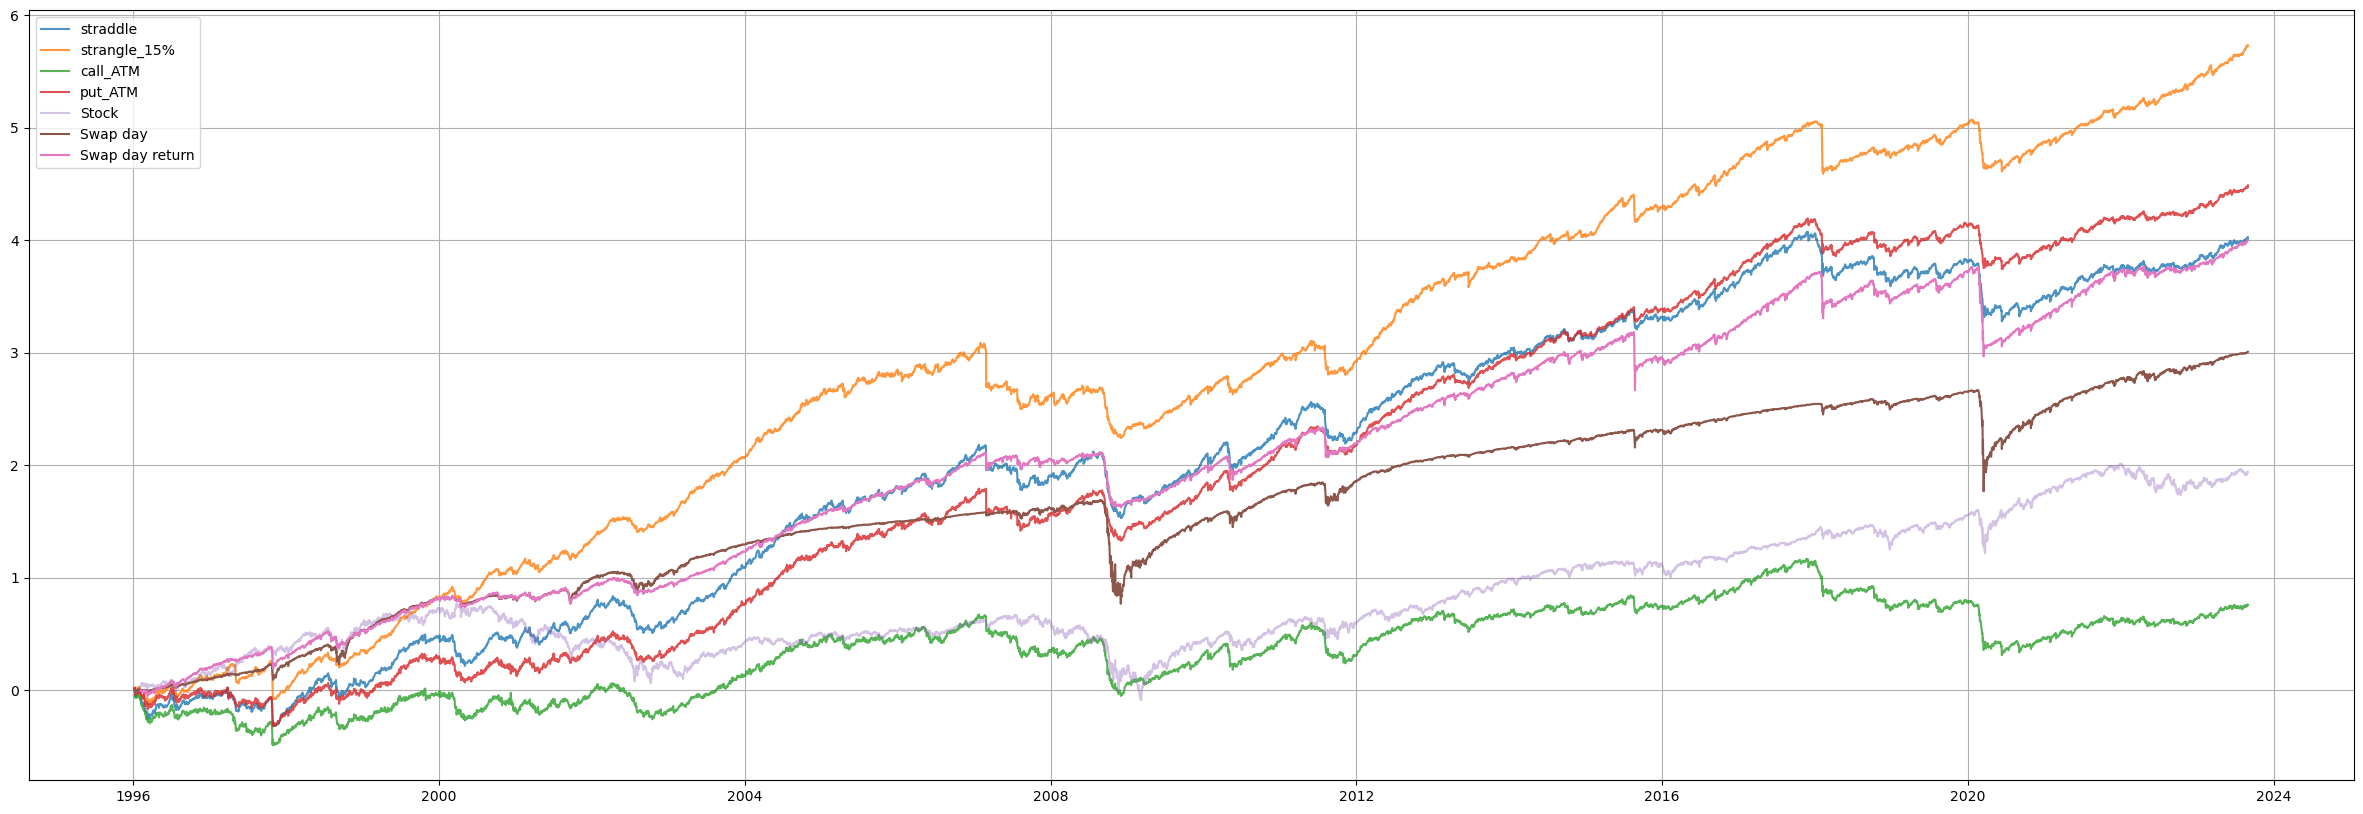

In [59]:
df_returns = vp.make_df_strats(df_orpy, sgy_common = "r_D_30_", sgy_names = ["straddle", "strangle_15%", "call_ATM", "put_ATM"], plot = True, factors=[])

# Performance Table

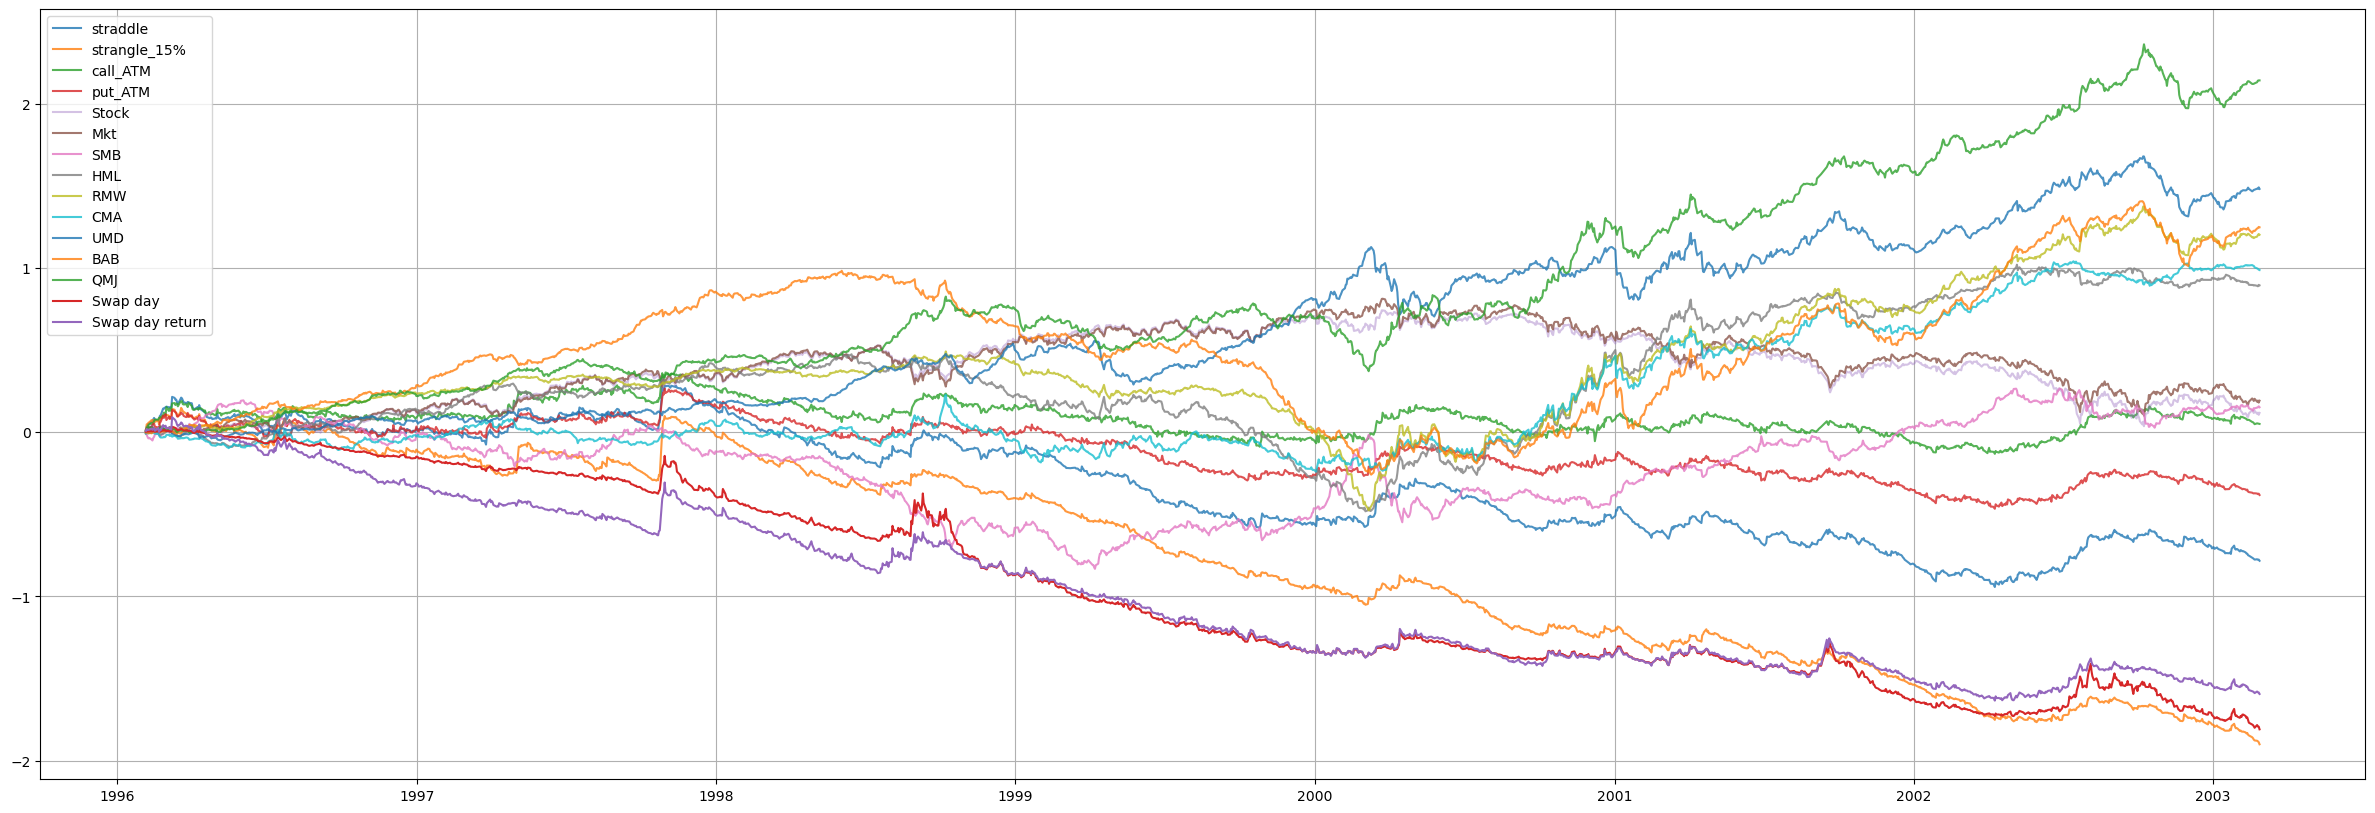

In [125]:
importlib.reload(vp)
df_spx = df_orpy[df_orpy["r_30_SW_day"].isna() == False]
df_spx = df_spx[df_spx["date"] < pd.Timestamp("2003-02-28")]
df_returns = vp.make_df_strats(df_spx, sgy_common = "r_D_30_", scale = True, sign=False, plot = True, ticker_list=["SPX"])

In [119]:
importlib.reload(vp)
vp.compute_extensive_performance_measures_cashflows(df_returns)

Ann. Mean  Ann. Std Dev  Ann. Sharpe Ratio  \
r_stock               0.069551      0.194018           0.358476   
r_D_30_straddle      -0.647859      0.847502          -0.764433   
r_D_30_strangle_15%  -3.488240      3.244467          -1.075135   
r_D_30_call_ATM      -0.167139      1.055666          -0.158325   
r_D_30_put_ATM       -0.886226      1.048139          -0.845524   
CF_30_SW_day         -0.147198      0.262003          -0.561816   
r_30_SW_day          -3.118700      4.160540          -0.749590   
Mkt                   0.088765      0.195297           0.454510   
SMB                   0.012914      0.100564           0.128417   
HML                   0.015673      0.120678           0.129877   
RMW                   0.048026      0.083774           0.573275   
CMA                   0.024274      0.072469           0.334960   
UMD                   0.042275      0.162002           0.260952   
BAB                   0.078156      0.125027           0.625115   
QMJ                   0.056071      0.092108           0.608746   

                     Ann. Sortino Ratio       Skew    Kurtosis  \
r_stock                        0.461300  -0.176735    9.539676   
r_D_30_straddle               -1.966302   3.688908   35.889872   
r_D_30_strangle_15%           -3.084288   9.613946  217.684851   
r_D_30_call_ATM               -0.325191   2.065249   14.304176   
r_D_30_put_ATM                -1.726886   2.661712   30.281069   
CF_30_SW_day                  -1.033886  11.561179  351.925591   
r_30_SW_day                   -1.591184   7.469824  149.094830   
Mkt                            0.582264  -0.240357    8.685351   
SMB                            0.190946   0.002600    3.841723   
HML                            0.180983   0.286388    7.092574   
RMW                            0.832442   0.264607    5.286113   
CMA                            0.458848  -0.398296    8.200886   
UMD                            0.301718  -1.124226   12.489107   
BAB                            0.757018  -0.468483   10.344567   
QMJ                            0.871264   0.205942    6.152299   

                     Max Drawdown (CumCF)  Ann. VaR 5%  Ann. CVaR 5%  \
r_stock                         -0.857602    -0.296329     -0.463134   
r_D_30_straddle                -19.227312    -0.953210     -1.223727   
r_D_30_strangle_15%            -98.067814    -3.305186     -4.188265   
r_D_30_call_ATM                 -9.040987    -1.373903     -1.812427   
r_D_30_put_ATM                 -26.067398    -1.385753     -1.839449   
CF_30_SW_day                    -4.080828    -0.206376     -0.423985   
r_30_SW_day                    -87.084167    -3.782674     -6.386712   
Mkt                             -0.717900    -0.303203     -0.464715   
SMB                             -0.552600    -0.155570     -0.221198   
HML                             -0.731400    -0.180969     -0.282220   
RMW                             -0.530200    -0.125409     -0.188798   
CMA                             -0.286000    -0.104772     -0.166889   
UMD                             -0.942300    -0.241293     -0.416755   
BAB                             -0.827437    -0.178567     -0.310532   
QMJ                             -0.357492    -0.134650     -0.207754   

                     Total Cashflow  Win Rate  Average Gain  Average Loss  \
r_stock                    1.915677  0.530183      0.007993     -0.008433   
r_D_30_straddle          -17.844391  0.363636      0.044182     -0.029287   
r_D_30_strangle_15%      -95.912766  0.347525      0.144884     -0.098384   
r_D_30_call_ATM           -4.603607  0.431206      0.052161     -0.040709   
r_D_30_put_ATM           -24.409905  0.405273      0.051546     -0.041039   
CF_30_SW_day              -4.054361  0.340297      0.008443     -0.005241   
r_30_SW_day              -85.900373  0.340297      0.175993     -0.109543   
Mkt                        2.444900  0.535514      0.008104     -0.008704   
SMB                        0.355700  0.506267

In [126]:
importlib.reload(vp)
vp.compute_extensive_performance_measures_cashflows_FF_factors(df_returns)

Ann. Mean  Ann. Std Dev  Ann. Sharpe Ratio  \
r_stock               0.016557      0.202747           0.081666   
r_D_30_straddle      -0.111071      0.202747          -0.547833   
r_D_30_strangle_15%  -0.270198      0.202747          -1.332687   
r_D_30_call_ATM       0.007062      0.202747           0.034830   
r_D_30_put_ATM       -0.054299      0.202747          -0.267816   
CF_30_SW_day         -0.256520      0.202747          -1.265227   
r_30_SW_day          -0.226017      0.202747          -1.114778   

                     Ann. Sortino Ratio      Skew    Kurtosis  \
r_stock                        0.122387  0.003750    2.298475   
r_D_30_straddle               -1.457711  3.958497   44.112976   
r_D_30_strangle_15%           -3.702545  7.647602  129.658955   
r_D_30_call_ATM                0.066739  1.625944   13.303853   
r_D_30_put_ATM                -0.532801  1.303250    7.414025   
CF_30_SW_day                  -2.243692  2.901981   28.707645   
r_30_SW_day                   -2.526805  4.231584   46.589287   

                     Max Drawdown (CumCF)  Ann. VaR 5%  Ann. CVaR 5%  \
r_stock                         -0.705230    -0.331161     -0.443304   
r_D_30_straddle                 -1.226579    -0.228402     -0.281313   
r_D_30_strangle_15%             -2.048313    -0.218777     -0.265584   
r_D_30_call_ATM                 -0.495472    -0.275782     -0.364069   
r_D_30_put_ATM                  -0.732258    -0.278459     -0.358327   
CF_30_SW_day                    -1.842217    -0.233742     -0.400924   
r_30_SW_day                     -1.725522    -0.233240     -0.322559   

                     Total Cashflow  ...  Gain/Loss Ratio  Profit Factor  \
r_stock                    0.116822  ...         1.016221       1.013937   
r_D_30_straddle           -0.783670  ...         1.499399       0.900179   
r_D_30_strangle_15%       -1.901035  ...         1.438481       0.748849   
r_D_30_call_ATM            0.049823  ...         1.167475       1.006107   
r_D_30_put_ATM            -0.383108  ...         1.208282       0.955188   
CF_30_SW_day              -1.809894  ...         1.389000       0.762256   
r_30_SW_day               -1.594678  ...         1.455794       0.798911   

                     Calmar Ratio  Tail Ratio  Recovery Duration (years)  \
r_stock                  0.023478    0.929394                  38.092058   
r_D_30_straddle         -0.090554    1.040293                        NaN   
r_D_30_strangle_15%     -0.131912    0.804444                        NaN   
r_D_30_call_ATM          0.014252    1.052896                  45.237126   
r_D_30_put_ATM          -0.074153    1.058193                        NaN   
CF_30_SW_day            -0.139246    0.907452                        NaN   
r_30_SW_day             -0.130985    0.986979                        NaN   

                     Lag-1 Autocorrelation  FF3 Alpha  FF3 Beta (Mkt)  \
r_stock                          -0.004237  -0.012454        0.970318   
r_D_30_straddle                  -0.021404  -0.087836       -0.404588   
r_D_30_strangle_15%              -0.012681  -0.246458       -0.373727   
r_D_30_call_ATM                  -0.263923   0.020250       -0.251078   
r_D_30_put_ATM                   -0.275700  -0.037317       -0.284399   
CF_30_SW_day                     -0.087409  -0.212727       -0.790060   
r_30_SW_day                      -0.092284  -0.188744       -0.735765   

                     FF3 Beta (SMB)  FF3 Beta (HML)  
r_stock                   -0.127651        0.043098  
r_D_30_straddle           -0.104422       -0.079228  
r_D_30_strangle_15%       -0.096771       -0.093245  
r_D_30_call_ATM           -0.064770       -0.039453  
r_D_30_put_ATM            -0.080753       -0.059576  
CF_30_SW_day              -0.068326       -0.165206  
r_30_SW_day               -0.059738       -0.126794  

[7 rows x 23 columns]

## Regressions (beta in CAPM, ...)

In [123]:
df_spx = df_orpy
df_spx = df_spx[df_spx["date"] < pd.Timestamp("2003-02-28")]

### CAPM

In [64]:
df = vp.make_df_strats(df_spx, sgy_common = "r_D_30_", sign=False, scale = True, plot = False, ticker_list=["SPX"])

target_column = 'r_30_SW_day'
feature_columns = ['Mkt']

_ = vp.lm_regress(df, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:            r_30_SW_day   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1193.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          2.06e-200
Time:                        19:24:34   Log-Likelihood:                 5693.9
No. Observations:                1778   AIC:                        -1.138e+04
Df Residuals:                    1776   BIC:                        -1.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.000     -3.536      0.0

### Fama-French 3 factor

In [124]:
df = vp.make_df_strats(df_spx, sign=False, scale = True, plot = False)

target_column = 'r_30_SW_day'
feature_columns = ['Mkt', 'SMB', 'HML']

_ = vp.lm_regress(df, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:            r_30_SW_day   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     413.2
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          1.61e-203
Time:                        20:27:19   Log-Likelihood:                 5708.1
No. Observations:                1778   AIC:                        -1.141e+04
Df Residuals:                    1774   BIC:                        -1.139e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.000     -3.213      0.0

### Fama-French 5 factor

In [66]:
df = vp.make_df_strats(df_orpy, sign=False, scale = True, plot = False)

target_column = 'r_30_SW_day'
feature_columns = ['Mkt', 'SMB', 'HML', 'RMW', 'CMA']

_ = vp.lm_regress(df, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:            r_30_SW_day   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     704.6
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:24:45   Log-Likelihood:                 22155.
No. Observations:                6941   AIC:                        -4.430e+04
Df Residuals:                    6935   BIC:                        -4.426e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -2.762      0.0

### Factor Zoo

In [67]:
df = vp.make_df_strats(df_orpy, sign=False, scale = True, plot = False)

target_column = 'r_30_SW_day'
feature_columns = ['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'BAB', 'QMJ']

_ = vp.lm_regress(df, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:            r_30_SW_day   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     522.7
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:25:19   Log-Likelihood:                 22368.
No. Observations:                6941   AIC:                        -4.472e+04
Df Residuals:                    6932   BIC:                        -4.466e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -2.056      0.0

# Other stuff from here

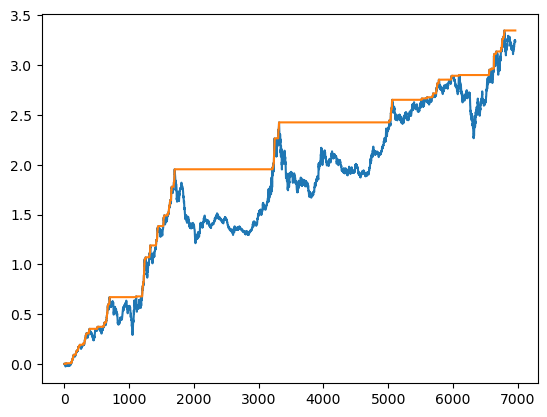

In [60]:
plt.plot(pnl_path)
plt.plot(peak)

KeyError: 'Mkt'

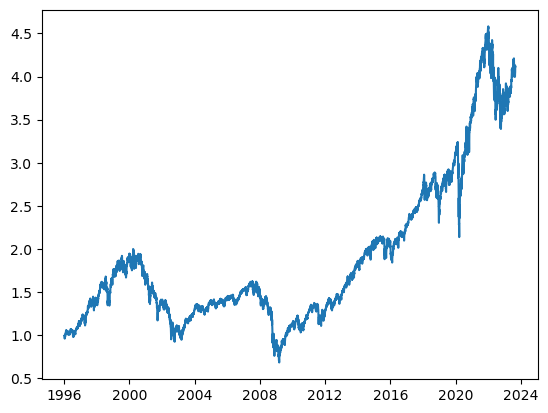

In [92]:
df_spx = df_orpy[df_orpy["ticker"].isin(["SPX"])]
plt.plot(df_spx["date"], np.cumprod(1+df_spx["r_stock"]), label="r_stock")
plt.plot(df_spx["date"], np.cumprod(1+df_spx["Mk t"]), label="Mkt")
plt.legend()

In [79]:
importlib.reload(vp)
vp.compute_performance_measures_cashflows(df_returns)

Mean   Std Dev  Sharpe Ratio  Sortino Ratio  \
r_stock              0.000276  0.012222      0.022582       0.029059   
r_D_30_straddle      0.000589  0.012222      0.048155       0.042554   
r_D_30_strangle_15%  0.000828  0.012222      0.067727       0.051562   
r_D_30_call_ATM      0.000122  0.012222      0.009974       0.010530   
r_D_30_put_ATM       0.000651  0.012222      0.053263       0.054752   
CF_30_SW_day         0.000433  0.012222      0.035391       0.025586   
r_30_SW_day          0.000577  0.012222      0.047220       0.035945   
Mkt                  0.000350  0.012222      0.028631       0.036679   
SMB                  0.000099  0.012222      0.008089       0.012028   
HML                  0.000100  0.012222      0.008181       0.011401   
RMW                  0.000441  0.012222      0.036113       0.052439   
CMA                  0.000258  0.012222      0.021101       0.028905   
UMD                  0.000201  0.012222      0.016438       0.019006   
BAB                  0.000481  0.012222      0.039379       0.047688   
QMJ                  0.000469  0.012222      0.038347       0.054884   

                          Skew    Kurtosis  Max Drawdown (CumCF)    VaR 5%  \
r_stock              -0.176735    9.539676             -0.857602 -0.018667   
r_D_30_straddle      -3.688908   35.889872             -0.798065 -0.019096   
r_D_30_strangle_15%  -9.613946  217.684851             -0.845662 -0.015059   
r_D_30_call_ATM      -2.065249   14.304176             -0.858523 -0.020074   
r_D_30_put_ATM       -2.661712   30.281069             -0.463359 -0.018945   
CF_30_SW_day        -11.561179  351.925591             -0.920984 -0.009789   
r_30_SW_day          -7.469824  149.094830             -0.793316 -0.013799   
Mkt                  -0.240357    8.685351             -0.713195 -0.018975   
SMB                   0.002600    3.841723             -1.066130 -0.018907   
HML                   0.286388    7.092574             -1.175894 -0.018328   
RMW                   0.264607    5.286113             -1.227922 -0.018296   
CMA                  -0.398296    8.200886             -0.765695 -0.017670   
UMD                  -1.124226   12.489107             -1.128520 -0.018204   
BAB                  -0.468483   10.344567             -1.284024 -0.017456   
QMJ                   0.205942    6.152299             -0.753024 -0.017867   

                      CVaR 5%  Total Cashflow  
r_stock             -0.029175        1.915677  
r_D_30_straddle     -0.035970        4.085096  
r_D_30_strangle_15% -0.032839        5.735537  
r_D_30_call_ATM     -0.034071        0.846083  
r_D_30_put_ATM      -0.033083        4.518438  
CF_30_SW_day        -0.027951        3.002318  
r_30_SW_day         -0.032060        4.005773  
Mkt                 -0.029082        2.428877  
SMB                 -0.026883        0.686252  
HML                 -0.028582        0.694057  
RMW                 -0.027544        3.063552  
CMA                 -0.028146        1.790013  
UMD                 -0.031441        1.394513  
BAB                 -0.030356        3.340585  
QMJ                 -0.027567        3.253110

In [32]:
df_spx = df_orpy
df_spx = df_spx[df_spx["date"] < pd.Timestamp("2003-02-28")]

In [19]:
df = vp.make_df_strats(df_spx, sgy_common = "r_D_30_", sign=False, scale = True, plot = False, ticker_list=["SPX"])

target_column = 'r_30_SW_day'
feature_columns = ['Mkt']

_ = vp.lm_regress(df, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:            r_30_SW_day   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1193.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          2.06e-200
Time:                        13:26:25   Log-Likelihood:                 5693.9
No. Observations:                1778   AIC:                        -1.138e+04
Df Residuals:                    1776   BIC:                        -1.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.000     -3.536      0.0

In [39]:
df = vp.make_df_strats(df_spx, sign=False, scale = True, plot = False)

target_column = 'r_30_SW_day'
feature_columns = ['Mkt', 'SMB', 'HML']

_ = vp.lm_regress(df, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:            r_30_SW_day   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     413.2
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          1.61e-203
Time:                        17:19:39   Log-Likelihood:                 5708.1
No. Observations:                1778   AIC:                        -1.141e+04
Df Residuals:                    1774   BIC:                        -1.139e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.000     -3.213      0.0

In [29]:
df = vp.make_df_strats(df_orpy, sign=False, scale = True, plot = False)

target_column = 'r_30_SW_day'
feature_columns = ['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'BAB', 'QMJ']

_ = vp.lm_regress(df, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:            r_30_SW_day   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     522.7
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:49:04   Log-Likelihood:                 22368.
No. Observations:                6941   AIC:                        -4.472e+04
Df Residuals:                    6932   BIC:                        -4.466e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -2.056      0.0

In [30]:
df = vp.make_df_strats(df_orpy, sign=True, scale = True, plot = False)

target_column = 'r_30_SW_day'
feature_columns = ['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'BAB', 'QMJ']

_ = vp.lm_regress(df, y_column = target_column, x_columns = feature_columns)

                            OLS Regression Results                            
Dep. Variable:            r_30_SW_day   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     522.7
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:49:20   Log-Likelihood:                 22368.
No. Observations:                6941   AIC:                        -4.472e+04
Df Residuals:                    6932   BIC:                        -4.466e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      2.056      0.0

# Older stuff from here (not iso-vol)

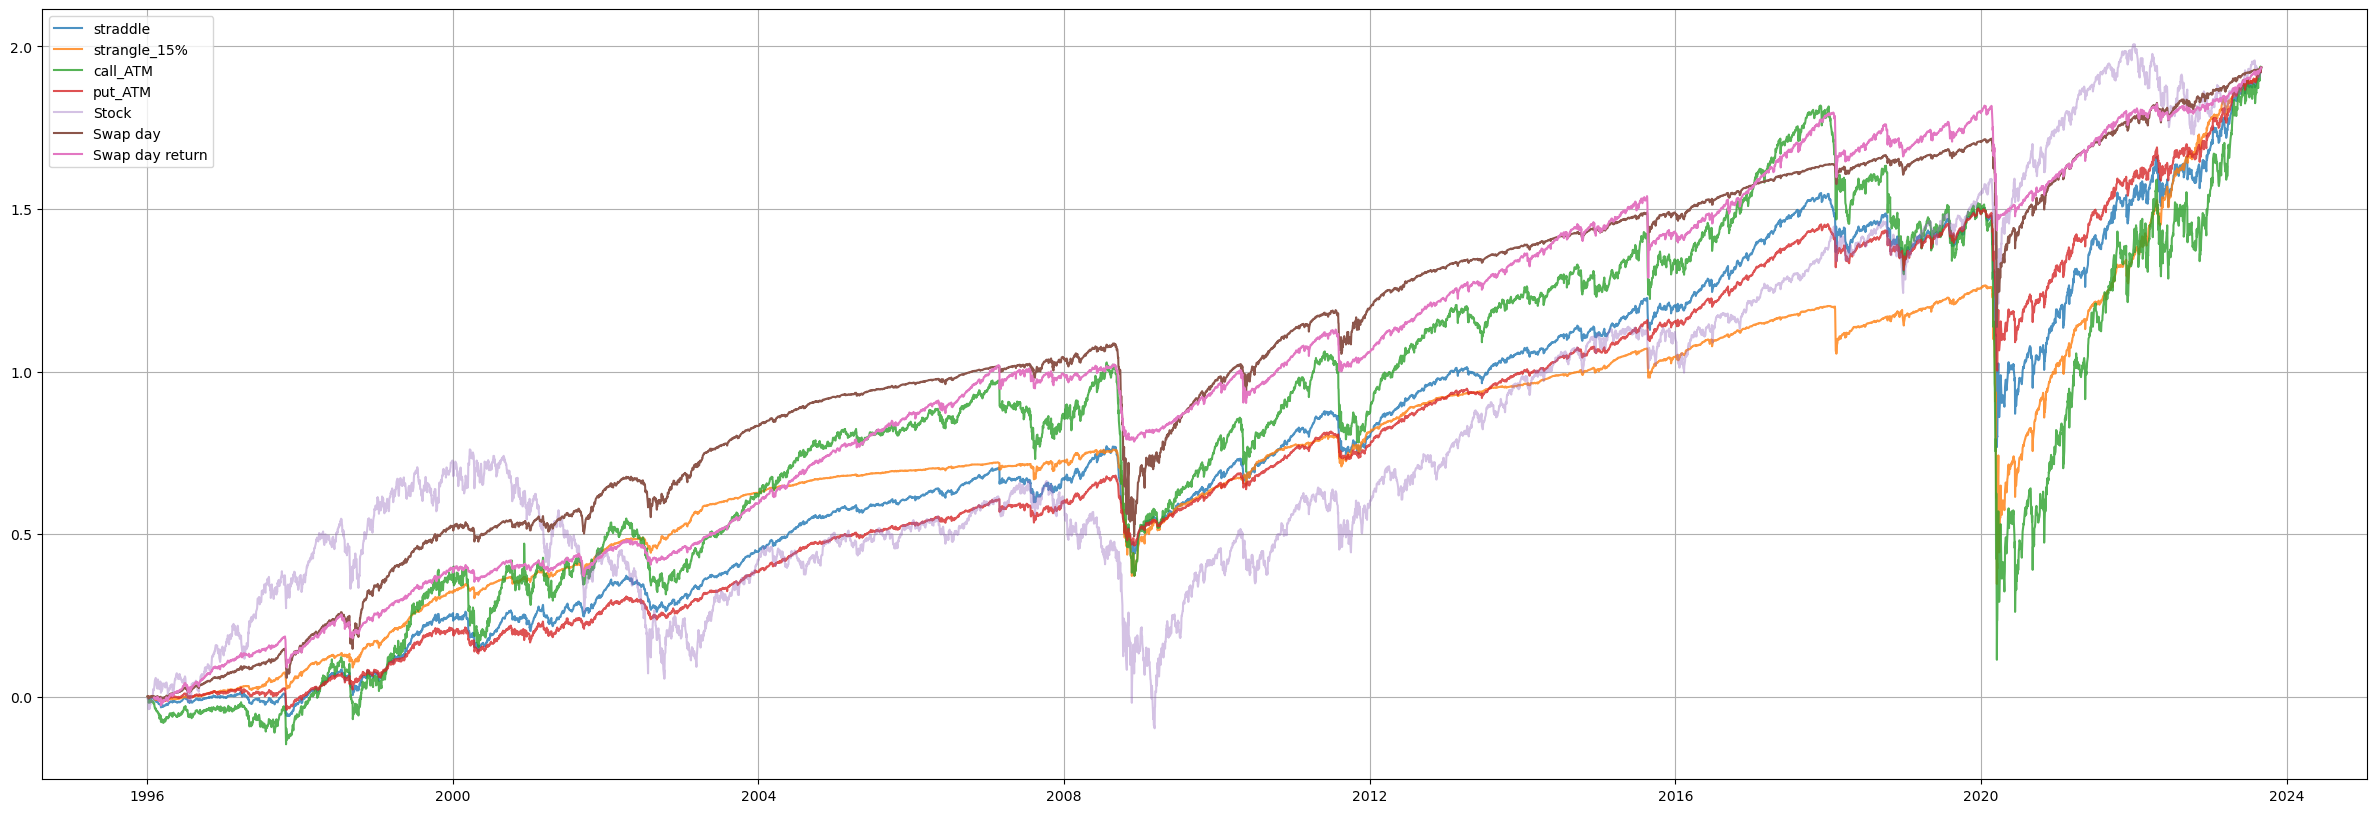

In [13]:
df = df_orpy[df_orpy["ticker"]=="SPX"]

sgy_common = "CF_D_30_"
sgy_list = ["straddle", "strangle_15%", "call_ATM", "put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_30_SW_day"]

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["r_stock"]).iloc[-1]

for sgy in sgy_list:
    sgy_str = sgy_common + sgy
    last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=rf"{sgy}", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["r_stock"]),
    label="Stock", alpha=0.4)


x_SW_dly = df["CF_30_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_30_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

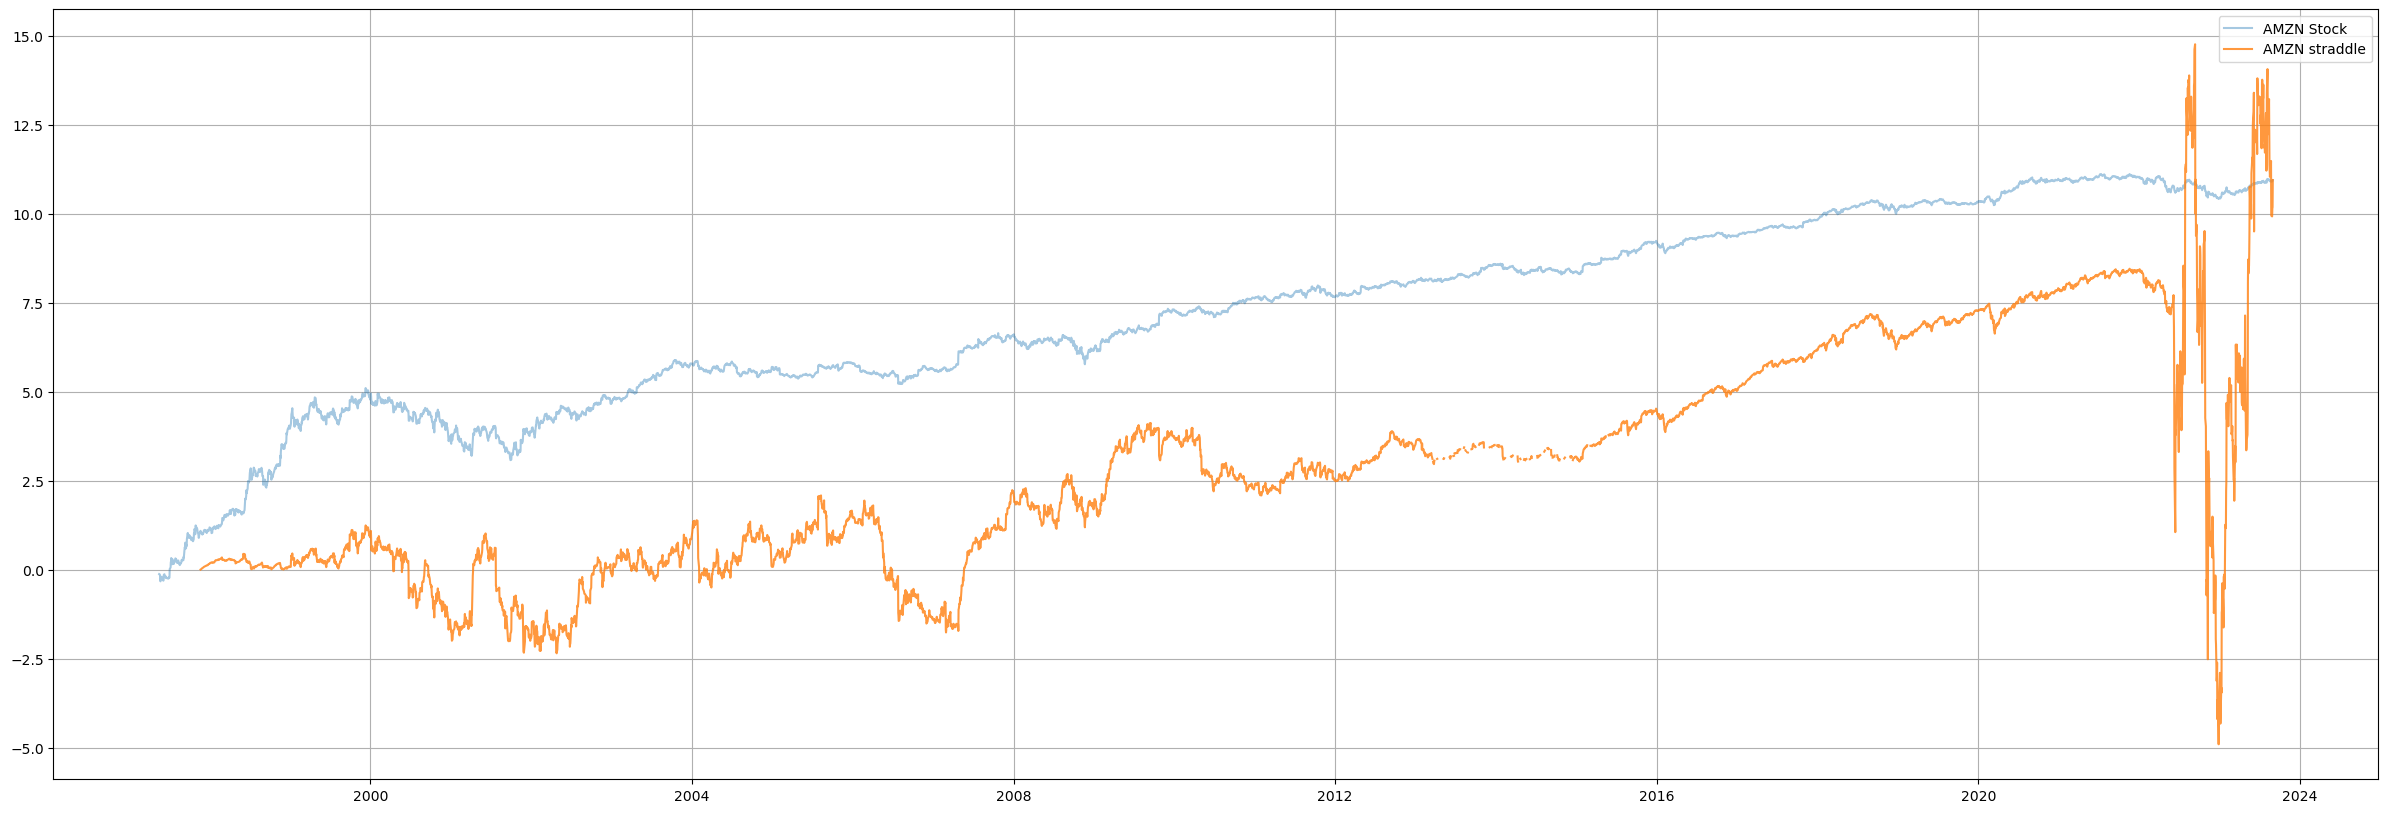

In [7]:
df = df_orpy[df_orpy["ticker"] == "AMZN"].copy()
tickers = df["ticker"].unique()  # adjust the column name if necessary

sgy_common = "r_D_30_"
sgy_list = ["straddle"] #"straddle", "strangle_15%", "call_ATM", "put_ATM"


plt.figure(figsize=(30, 10))

for ticker in tickers:
    # Subset and sort the DataFrame for the current ticker
    df_ticker = df[df["ticker"] == ticker].sort_values("date")
    
    # Compute the cumulative sum for stock cash flows for this ticker
    cumsum_stock = np.cumsum((df_ticker["r_stock"]))
    last_stock_val = cumsum_stock.iloc[-1]
    
    # Plot the cumulative sum of stock cash flows for this ticker
    plt.plot(df_ticker["date"], cumsum_stock,
             label=f"{ticker} Stock", alpha=0.4)
    
    # Loop over each strategy
    for sgy in sgy_list:
        sgy_str = sgy_common + sgy
        
        # Compute the cumulative sum for the option cash flow
        option_cumsum = np.cumsum((df_ticker[f"{sgy_str}"]))
        last_option_val = option_cumsum.iloc[-1]
        
        # Compute scaling factor to align with the stock's cumulative sum
        scalar = last_stock_val / last_option_val
        
        # Plot the scaled cumulative sum for the option strategy
        plt.plot(df_ticker["date"], scalar * option_cumsum,
                 label=f"{ticker} {sgy}", alpha=0.8)

plt.grid()
plt.legend()
plt.show()

In [59]:
 # df_orpy[["date", "return", "r_stock2", "r_stock"]]  # 2022-06-06 AMZN stock split 1/10

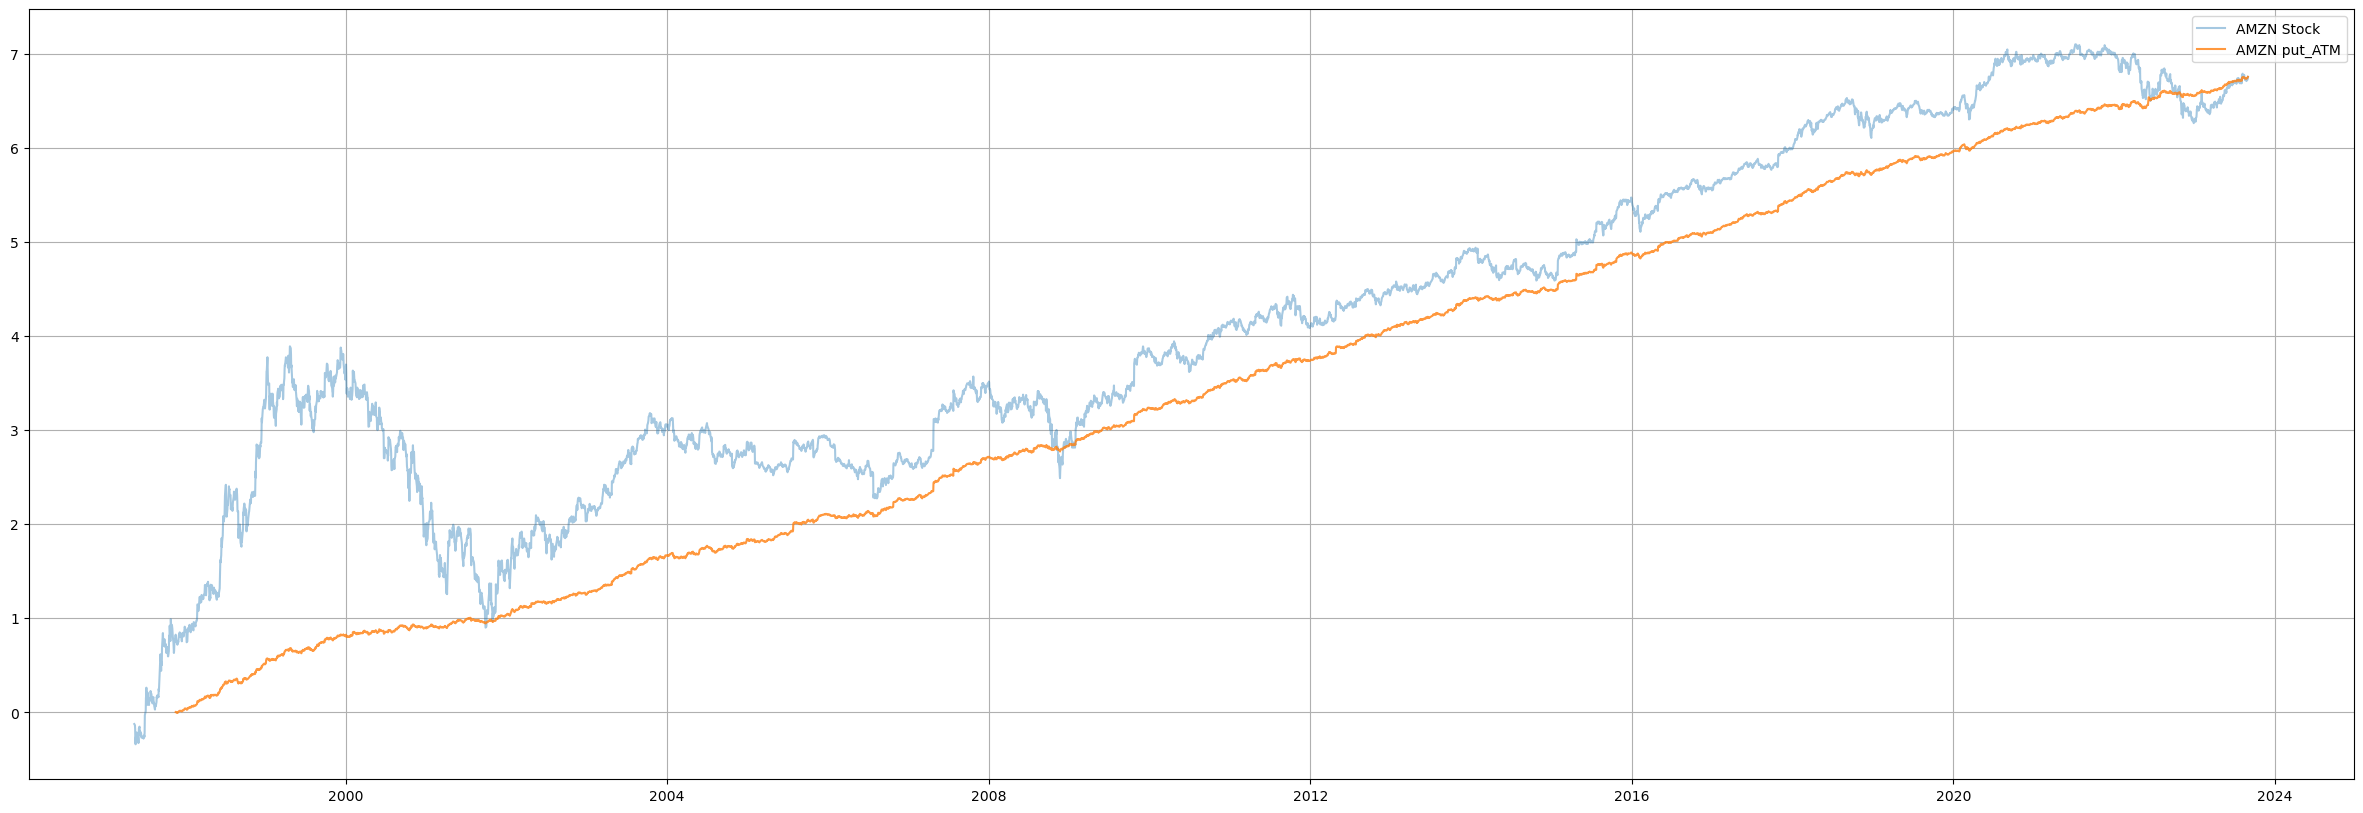

In [10]:
df = df_orpy[df_orpy["ticker"] == "AMZN"].copy()
tickers = df["ticker"].unique()  # adjust the column name if necessary

sgy_common = "r_30_"
sgy_list = ["put_ATM"] #"straddle", "strangle_15%", "call_ATM", "put_ATM"


plt.figure(figsize=(30, 10))

for ticker in tickers:
    # Subset and sort the DataFrame for the current ticker
    df_ticker = df[df["ticker"] == ticker].sort_values("date")
    
    # Compute the cumulative sum for stock cash flows for this ticker
    cumsum_stock = np.cumsum(np.log1p(df_ticker["r_stock"]))
    last_stock_val = cumsum_stock.iloc[-1]
    
    # Plot the cumulative sum of stock cash flows for this ticker
    plt.plot(df_ticker["date"], cumsum_stock,
             label=f"{ticker} Stock", alpha=0.4)
    
    # Loop over each strategy
    for sgy in sgy_list:
        sgy_str = sgy_common + sgy
        
        # Compute the cumulative sum for the option cash flow
        option_cumsum = np.cumsum(np.log1p(df_ticker[f"{sgy_str}"]))
        last_option_val = option_cumsum.iloc[-1]
        
        # Compute scaling factor to align with the stock's cumulative sum
        scalar = last_stock_val / last_option_val
        
        # Plot the scaled cumulative sum for the option strategy
        plt.plot(df_ticker["date"], scalar * option_cumsum,
                 label=f"{ticker} {sgy}", alpha=0.8)

plt.grid()
plt.legend()
plt.show()

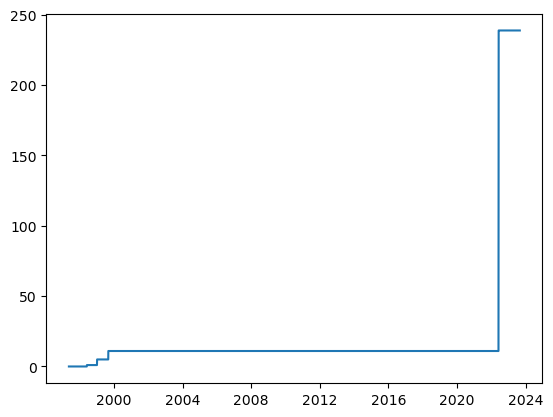

In [101]:
plt.plot(df_ticker["date"], ((df_ticker["adj_close"] - df_ticker["close"])/df_ticker["close"]))

In [81]:
df_ticker[["date", "close", "adj_close", "return"]][df_ticker["date"].dt.year == 1997].reset_index()
# df_ticker[["date", f"{sgy_str}"]][df_ticker["date"].dt.year == 1997].reset_index()

index       date    close  adj_close    return
0    14178 1997-01-02      NaN        NaN       NaN
1    14179 1997-01-03      NaN        NaN       NaN
2    14180 1997-01-06      NaN        NaN       NaN
3    14181 1997-01-07      NaN        NaN       NaN
4    14182 1997-01-08      NaN        NaN       NaN
..     ...        ...      ...        ...       ...
248  14426 1997-12-24  55.2500  53.585228 -0.004505
249  14427 1997-12-26  54.2500  52.603547 -0.018100
250  14428 1997-12-29  57.0000  55.258501  0.050691
251  14429 1997-12-30  58.1875  56.397544  0.020833
252  14430 1997-12-31  60.2500  58.384204  0.035446

[253 rows x 5 columns]

In [54]:
df_ticker[["date", f"{sgy_str}", "r_stock"]].sort_values(by=f"{sgy_str}", ascending=True)


date  r_D_30_put_ATM   r_stock
20645 2022-09-13      -88.087350 -0.070665
20829 2023-06-07      -80.687652 -0.042683
20744 2023-02-03      -75.001390 -0.084495
20680 2022-11-01      -61.171233 -0.055294
20581 2022-06-10      -60.319966 -0.055992
...          ...             ...       ...
18806 2015-05-26             NaN -0.005051
18809 2015-05-29             NaN  0.006236
18810 2015-06-01             NaN  0.003937
18815 2015-06-08             NaN -0.008081
18817 2015-06-10             NaN  0.012433

[6963 rows x 3 columns]

In [39]:
df_ticker[["date", f"{sgy_str}", "r_stock"]].sort_values(by=f"{sgy_str}", ascending=False)


date  r_D_30_put_ATM   r_stock
15653 2002-11-12       17.377180  0.043098
16771 2007-04-25        1.814125  0.269277
16333 2005-07-27        1.465324  0.156478
17402 2009-10-23        1.306782  0.267951
14597 1998-08-31        1.268435 -0.000196
...          ...             ...       ...
18806 2015-05-26             NaN -0.005051
18809 2015-05-29             NaN  0.006236
18810 2015-06-01             NaN  0.003937
18815 2015-06-08             NaN -0.008081
18817 2015-06-10             NaN  0.012433

[6963 rows x 3 columns]

In [62]:
df_ticker[["date", f"{sgy_str}"]][df_ticker["date"].dt.year == 1997]

date  r_D_30_put_ATM
14178 1997-01-02             NaN
14179 1997-01-03             NaN
14180 1997-01-06             NaN
14181 1997-01-07             NaN
14182 1997-01-08             NaN
...          ...             ...
14426 1997-12-24       -0.010021
14427 1997-12-26       -0.080684
14428 1997-12-29       -0.074593
14429 1997-12-30       -0.021529
14430 1997-12-31       -0.034155

[253 rows x 2 columns]

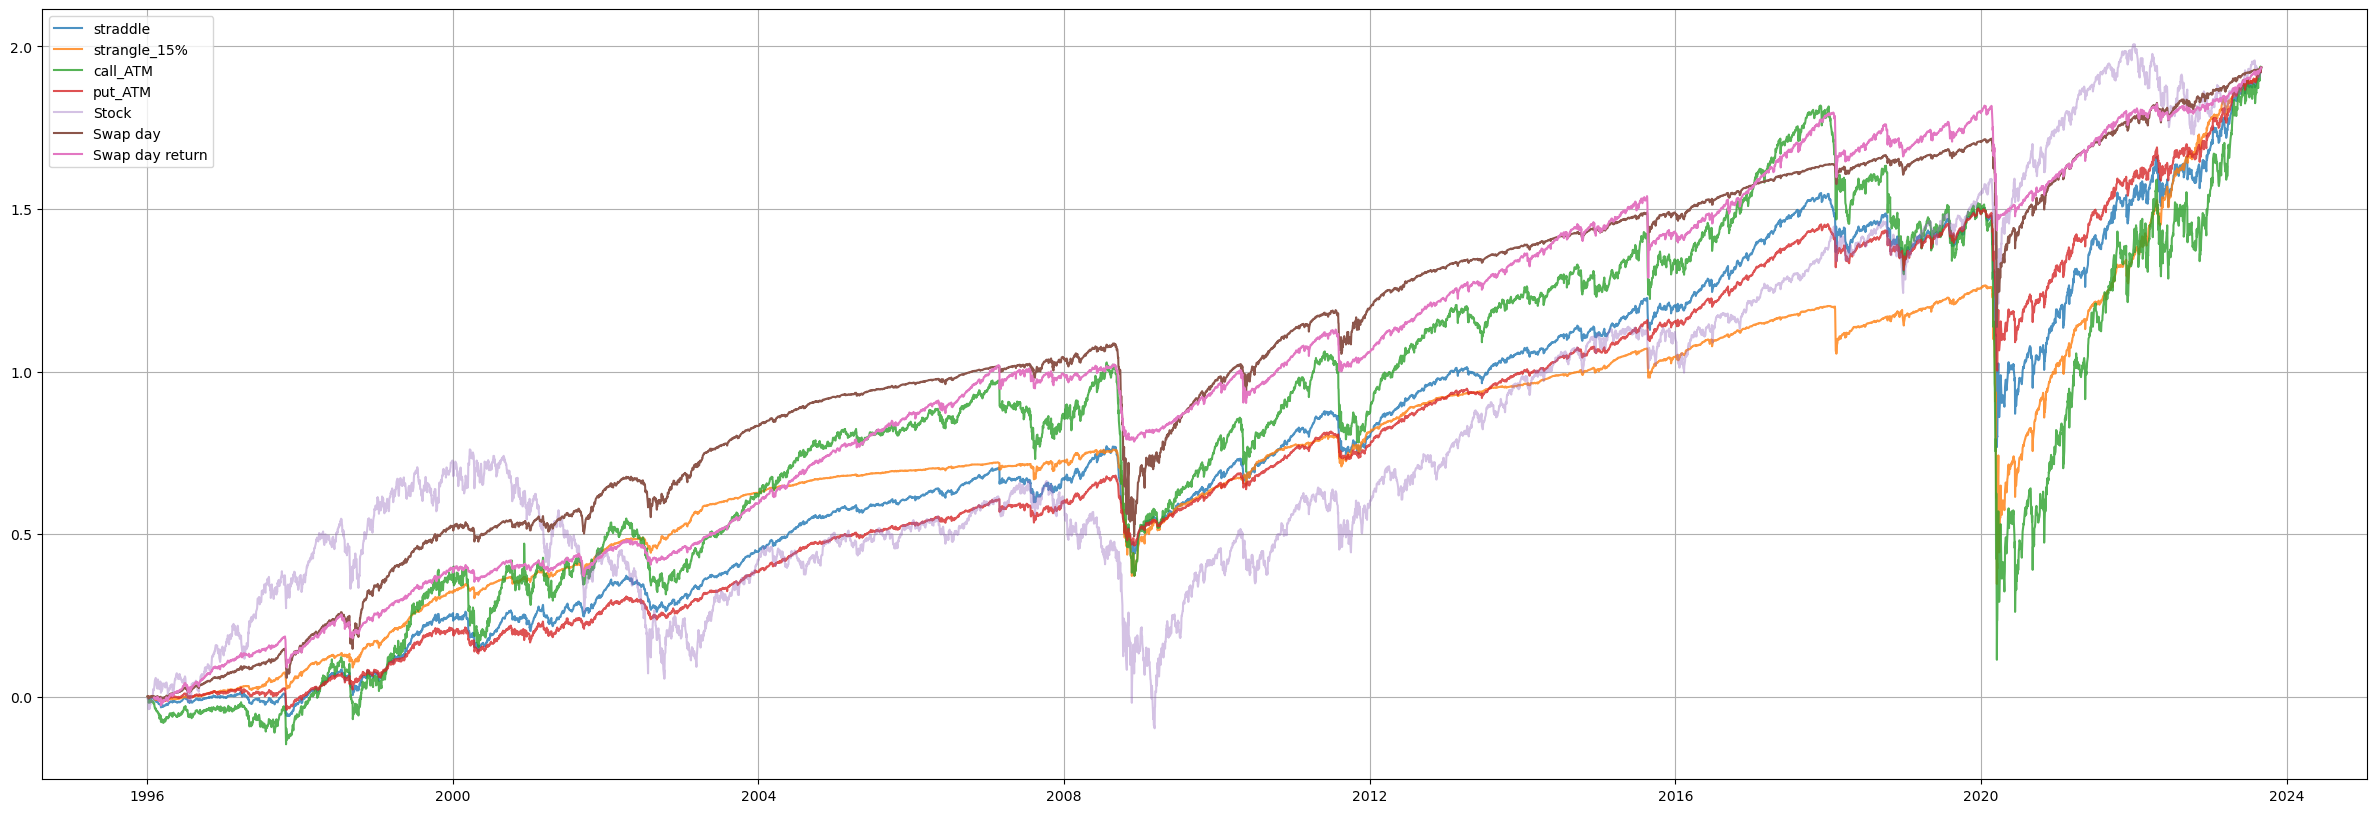

In [116]:
df = df_orpy[df_orpy["ticker"]=="SPX"]

sgy_common = "CF_D_30_"
sgy_list = ["straddle", "strangle_15%", "call_ATM", "put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_30_SW_day"]

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["r_stock"]).iloc[-1]
    
for sgy in sgy_list:
    sgy_str = sgy_common + sgy
    last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=rf"{sgy}", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["r_stock"]),
    label="Stock", alpha=0.4)


x_SW_dly = df["CF_30_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_30_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

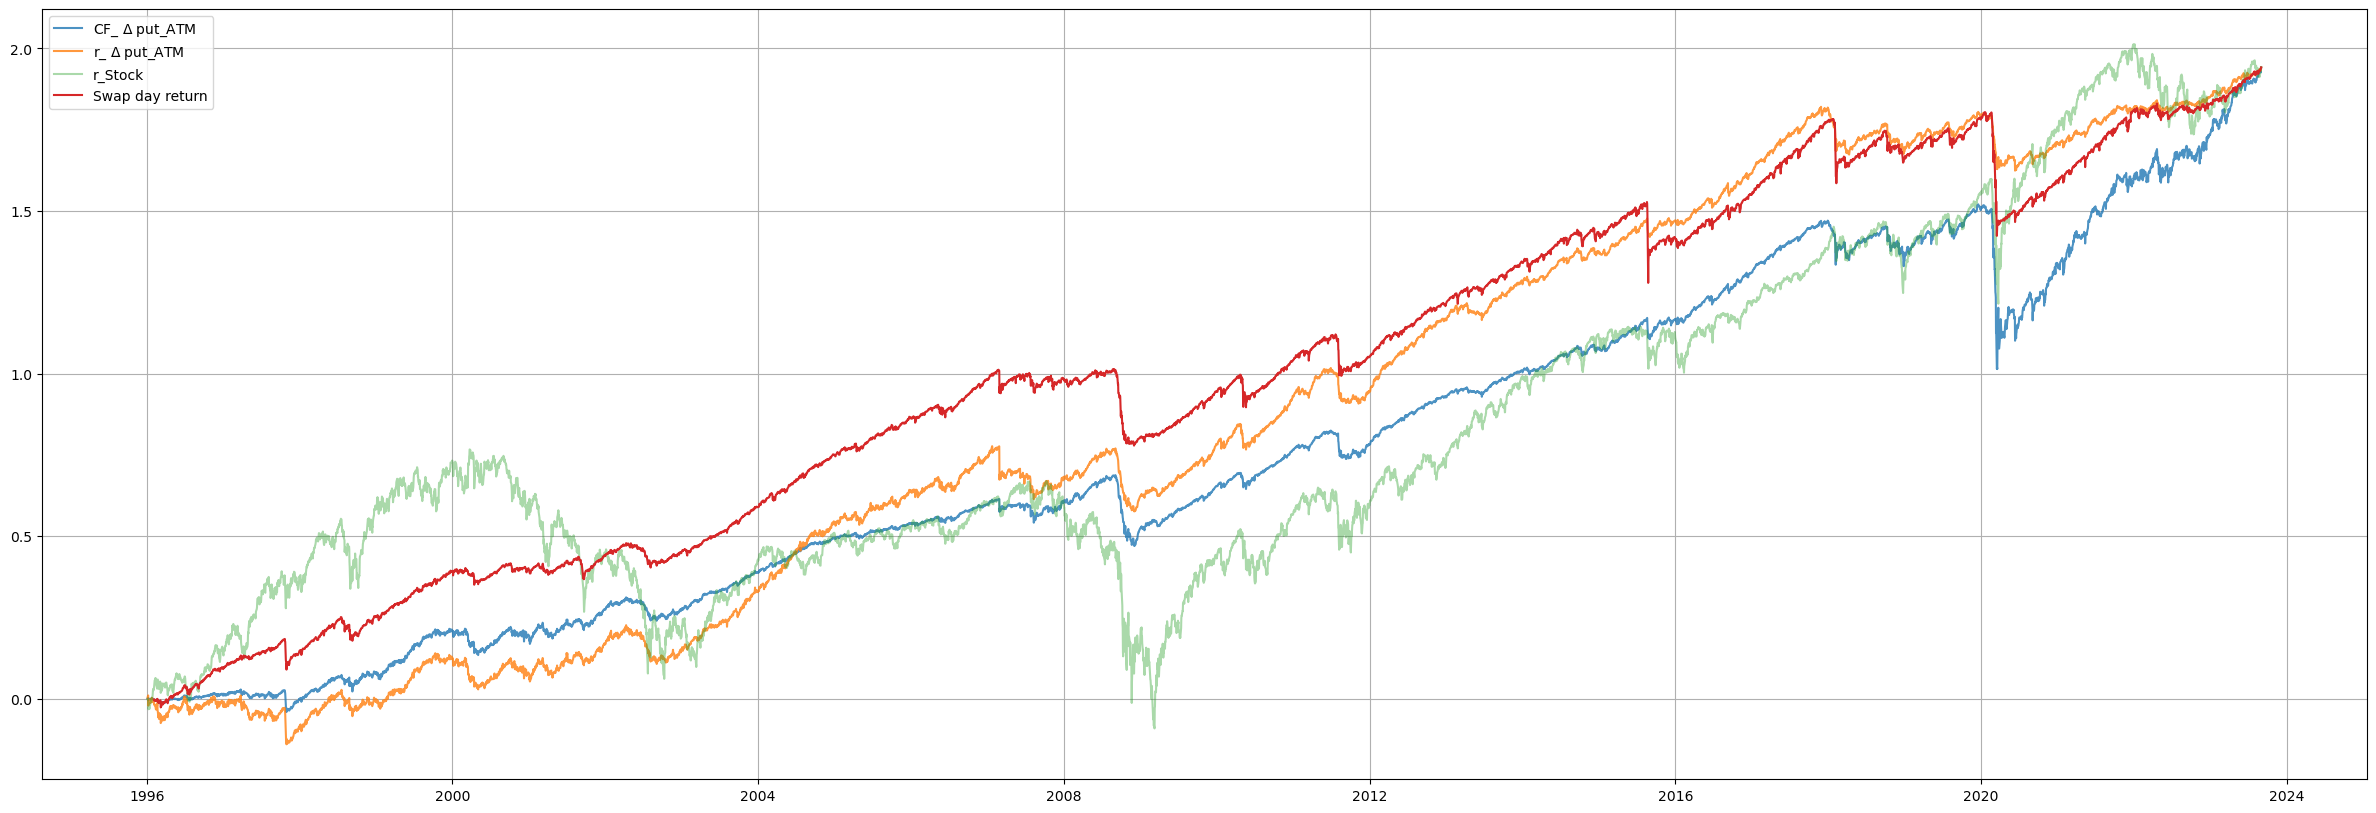

In [103]:
df = df_orpy

CF_r_list = ["CF_", "r_"]
sgy_common = "D_30_"
sgy_list = ["put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_SW_day"] = df["SW_day"] / df["SW_buy"].shift(1).rolling(window=21).mean()

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["r_stock"]).iloc[-1]
    
for CF_r in CF_r_list:
    for sgy in sgy_list:
        sgy_str = CF_r + sgy_common + sgy
        last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
        scalar = last_stock_val/last_option_val
        plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=fr"{CF_r} $\Delta$ {sgy}", alpha=0.8)
        
plt.plot(df["date"], np.cumsum(df["r_stock"]), label="r_Stock", alpha=0.4)


# x_SW_dly = df["SW_day"]
# last_val = np.cumsum(x_SW_dly).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

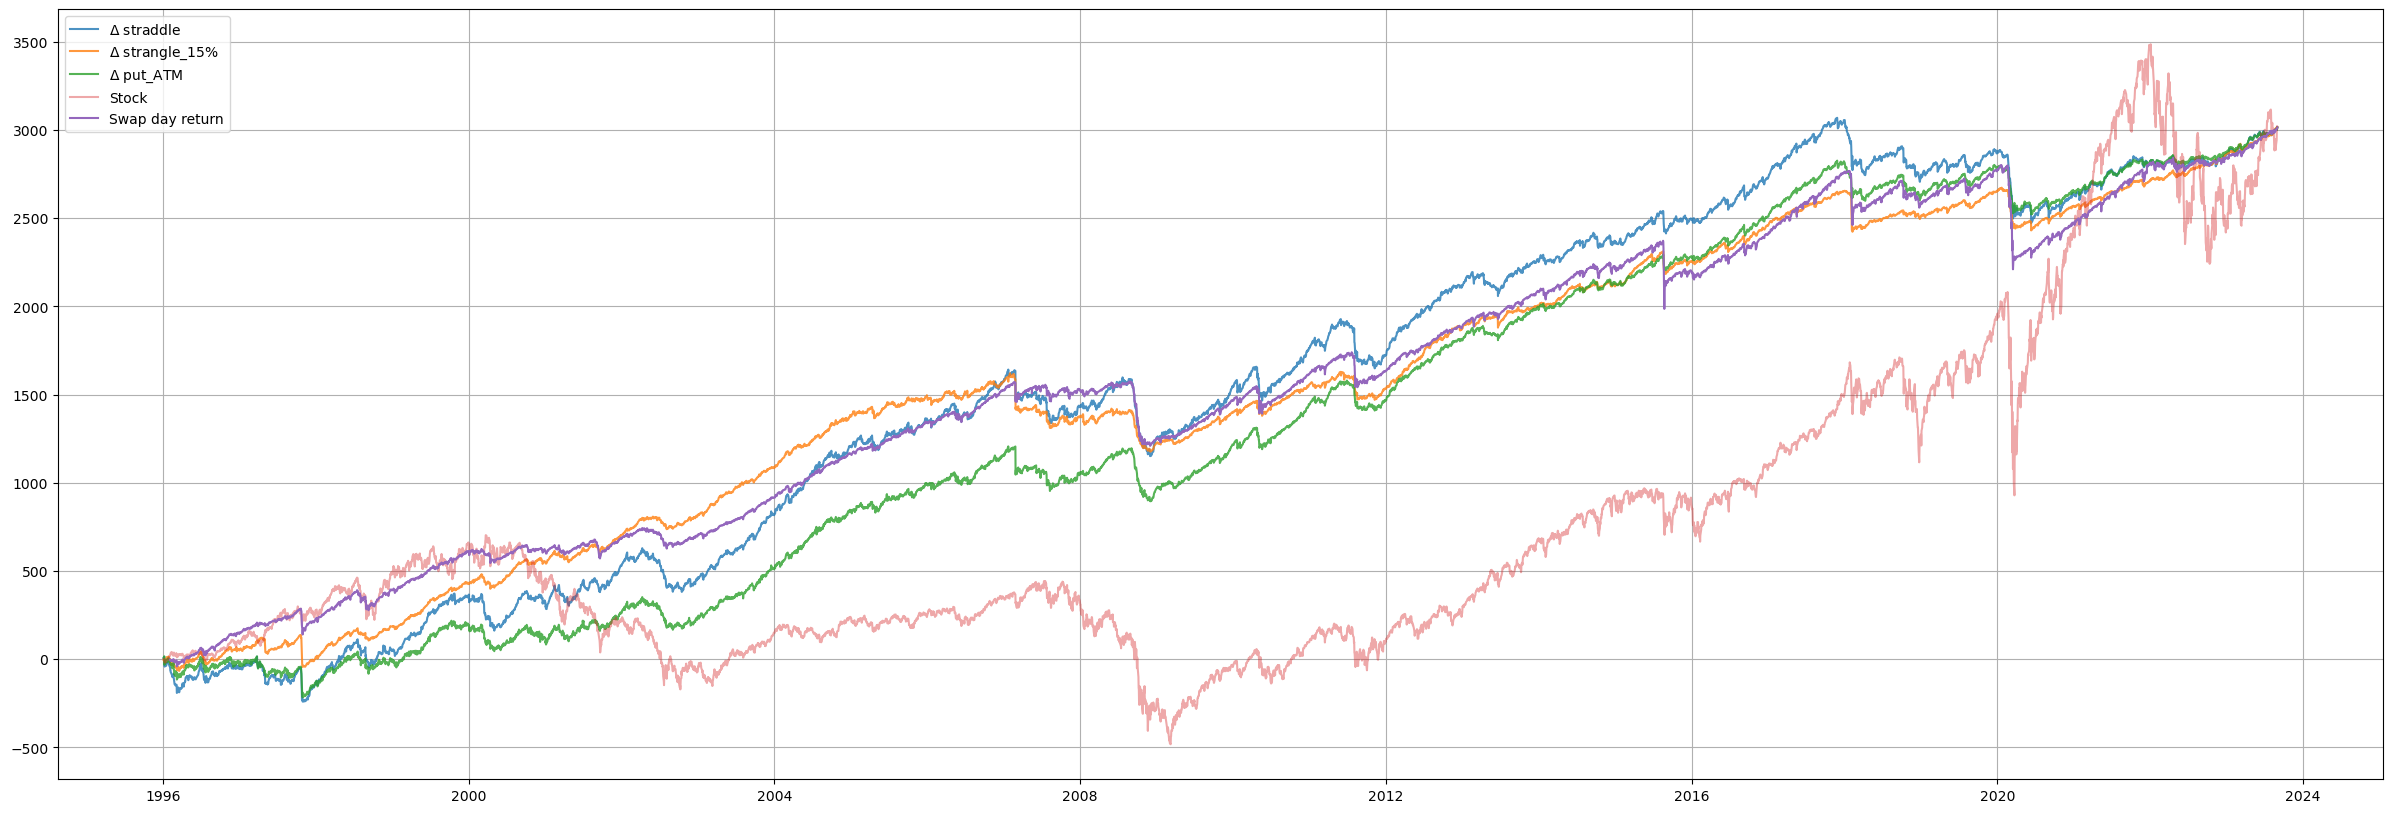

In [85]:
df = df_orpy

sgy_common = "r_D_30_"
sgy_list = ["straddle", "strangle_15%", "put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_SW_day"] = df["SW_day"] / df["SW_buy"].shift(1).rolling(window=21).mean()

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["CF_stock"]).iloc[-1]
    
for sgy in sgy_list:
    sgy_str = sgy_common + sgy
    last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=fr"$\Delta$ {sgy}", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["CF_stock"]),
    label="Stock", alpha=0.4)


# x_SW_dly = df["SW_day"]
# last_val = np.cumsum(x_SW_dly).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

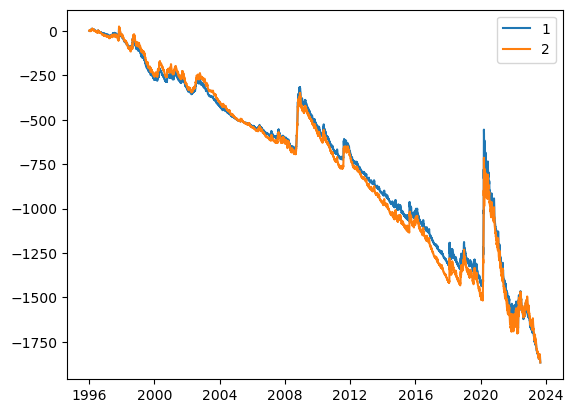

In [35]:
y1 = np.cumsum(df_orpy["CF_30_stacked_straddle_5%_15%"])
y2 = np.cumsum(df_orpy["CF_30_strangle_5%"])
k = y1.iloc[-1] / y2.iloc[-1]

plt.plot(df_orpy["date"], y1, label = "1")
plt.plot(df_orpy["date"], k * y2, label = "2")
plt.legend()

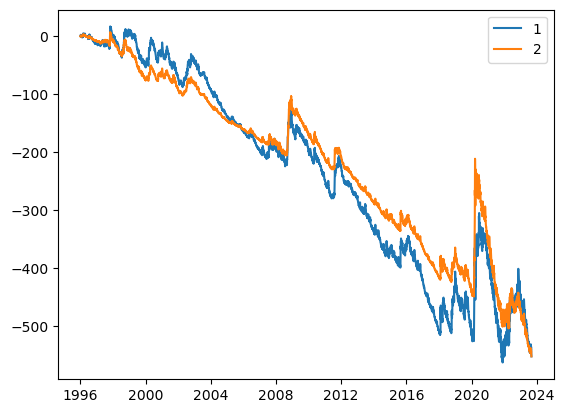

In [29]:
y1 = np.cumsum(df_orpy["CF_30_condor_strangle_5%_15%"])
y2 = np.cumsum(df_orpy["CF_30_strangle_5%"])
k = y1.iloc[-1] / y2.iloc[-1]

plt.plot(df_orpy["date"], y1, label = "1")
plt.plot(df_orpy["date"], k * y2, label = "2")
plt.legend()

### Limit to ticker subset (SPX) ect. if wanted

In [46]:
# df = df[sum_df["ticker"] == "SPX"].reset_index(drop=True)

# Test new const CF's

In [46]:
df = df_orpy

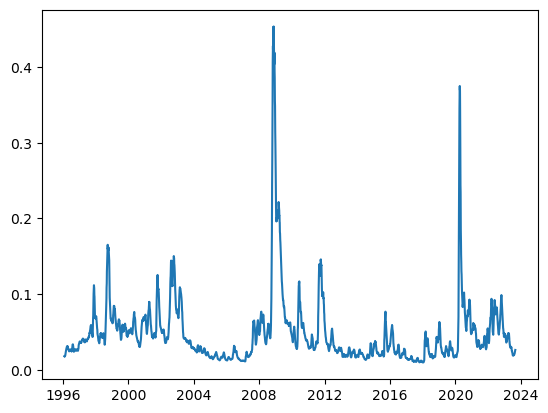

In [47]:
plt.plot(df["date"], df["SW_buy"].shift(1).rolling(window=21).mean())

In [70]:
# error = (
#         (df_old["30_call_ATM"] - df_orpy["CF_30_call_ATM"]) + 
#         (df_old["30_put_ATM"] - df_orpy["CF_30_put_ATM"]) + 
#         (df_old["30_call_OTM"] - df_orpy["CF_30_call_OTM_15%"]) + 
#         (df_old["30_put_OTM"] - df_orpy["CF_30_put_OTM_15%"]) + 
#         (df_old["30_call_D_ATM"] - df_orpy["CF_D_30_call_ATM"]) + 
#         (df_old["30_put_D_ATM"] - df_orpy["CF_D_30_put_ATM"]) +
#         (df_old["30_call_D_OTM"] - df_orpy["CF_D_30_call_OTM_15%"]) + 
#         (df_old["30_put_D_OTM"] - df_orpy["CF_D_30_put_OTM_15%"]) +
#         (df_old["30_straddle"] - df_orpy["CF_30_straddle"]) +
#         (df_old["30_D_straddle"] - df_orpy["CF_D_30_straddle"]) +
#         (df_old["30_strangle"] - df_orpy["CF_30_strangle_15%"]) +
#         (df_old["30_D_strangle"] - df_orpy["CF_D_30_strangle_15%"]) +
#         (df_old["30_butterfly_spread"] - df_orpy["CF_30_butterfly_spread_15%"]) +
#         (df_old["30_D_butterfly_spread"] - df_orpy["CF_D_30_butterfly_spread_15%"]) +
#         (df_old["ticker_change_free"] - df_orpy["CF_stock"]) 
#          )
# 
# # plt.plot(df_orpy["date"], error, label = "error")
# # plt.show()
# # plt.plot(df_orpy["date"], np.cumsum(error), label = "error")
# # plt.show()

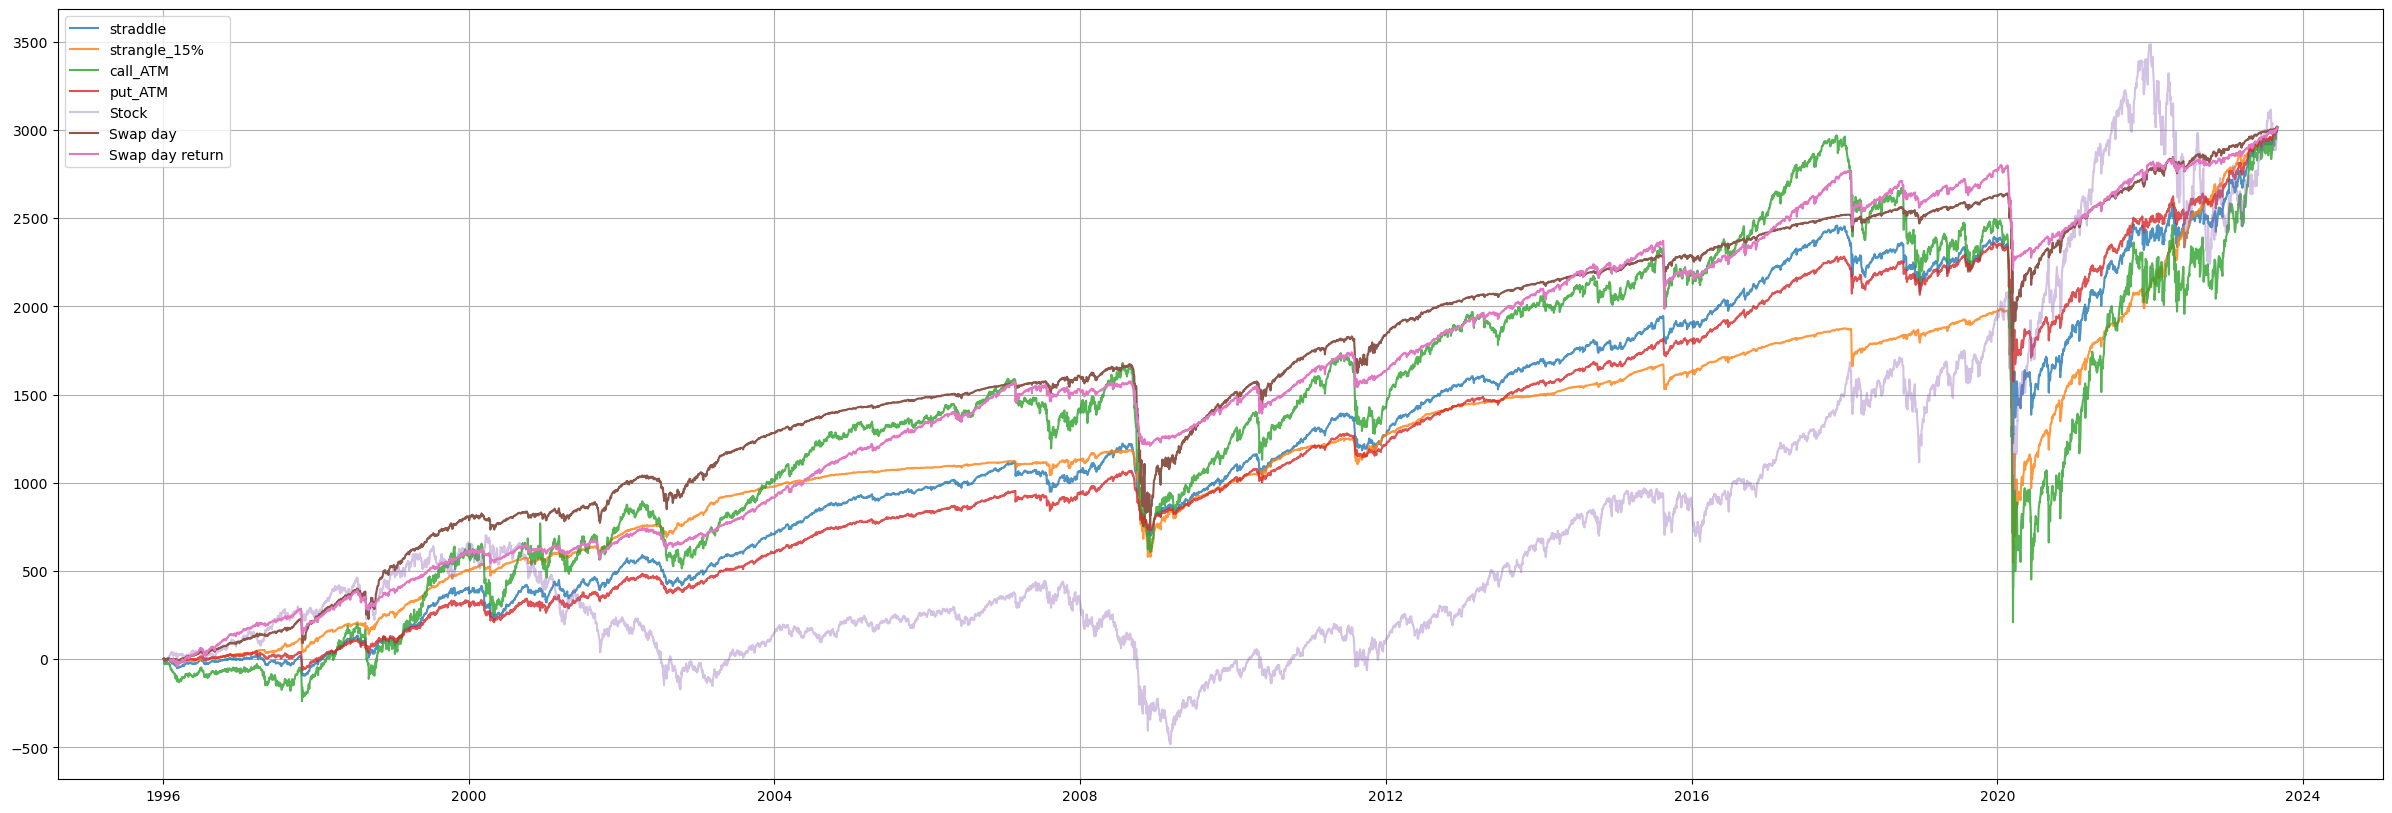

In [73]:
df = df_orpy

sgy_common = "CF_D_30_"
sgy_list = ["straddle", "strangle_15%", "call_ATM", "put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_SW_day"] = df["SW_day"] / df["SW_buy"].shift(1).rolling(window=21).mean()

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["CF_stock"]).iloc[-1]
    
for sgy in sgy_list:
    sgy_str = sgy_common + sgy
    last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=rf"{sgy}", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["CF_stock"]),
    label="Stock", alpha=0.4)


x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

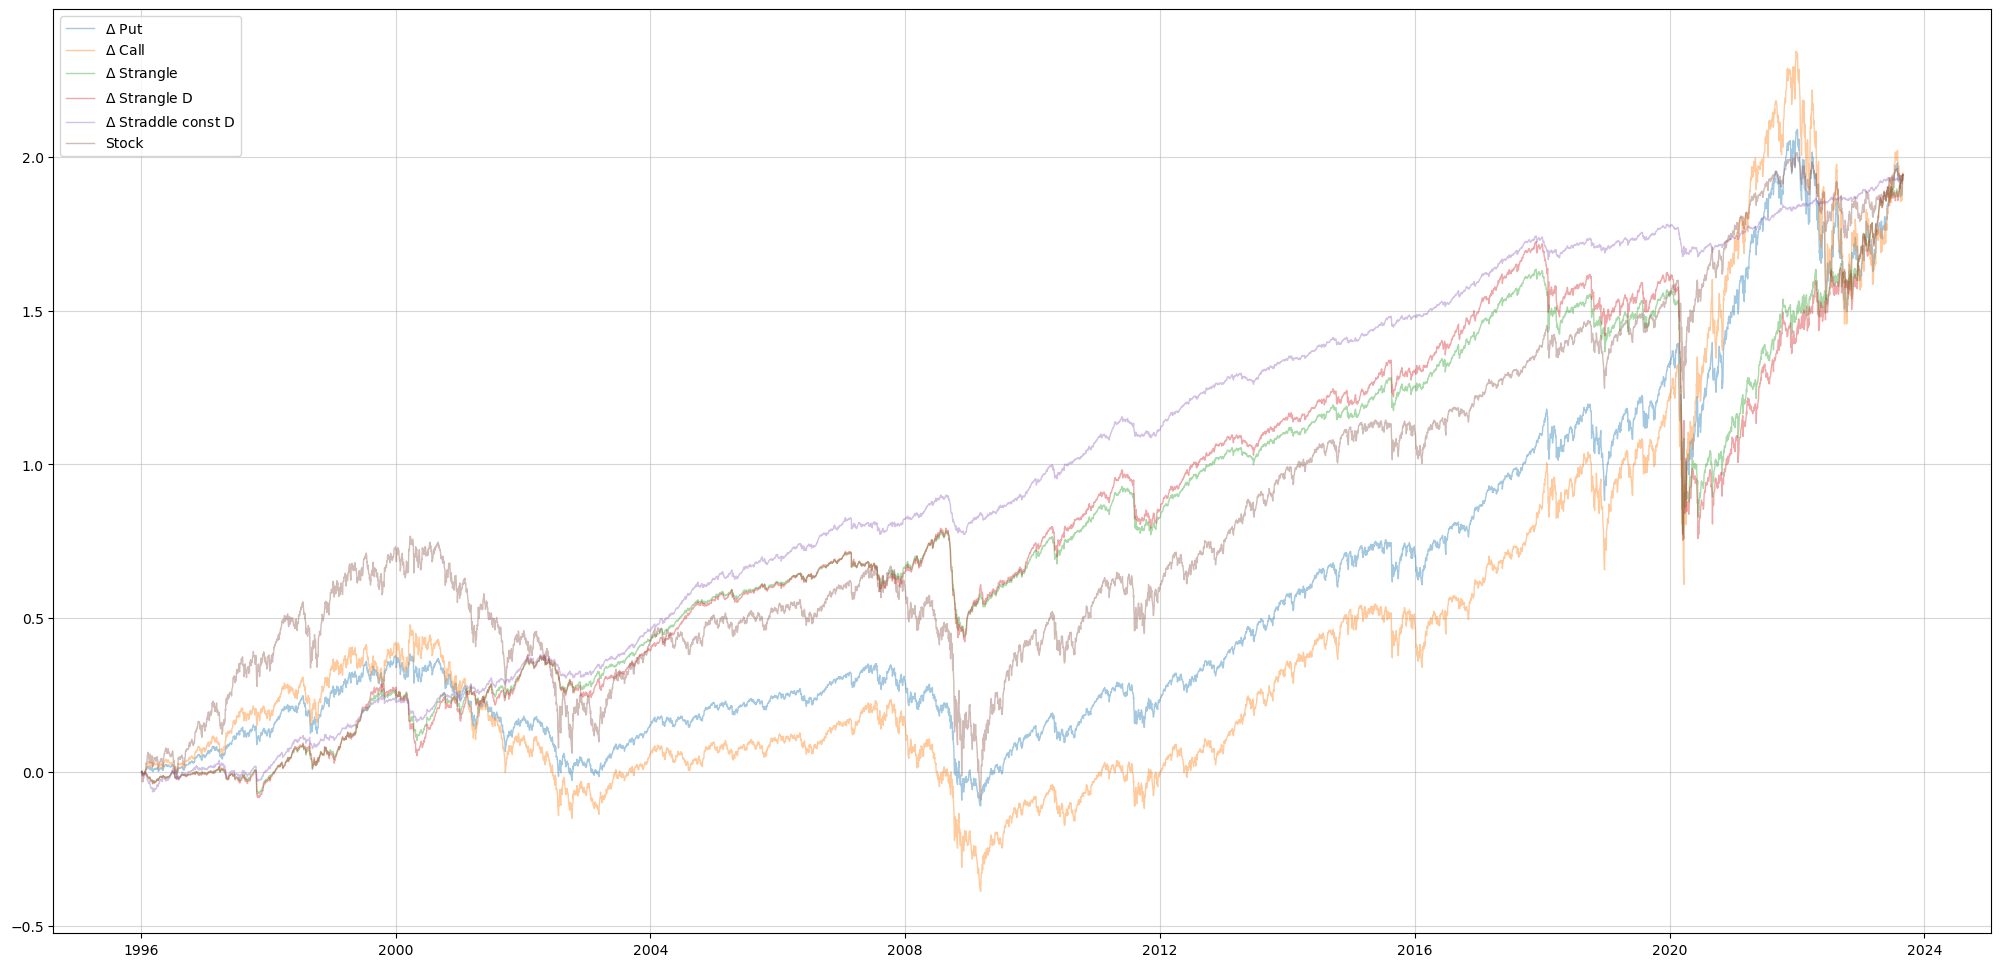

In [96]:
df = df_orpy.copy()

plt.figure(figsize=(25, 12))

lw = 1
names = ["Put", "Call", "Strangle", "Strangle D", "Straddle const D"]
# vars = ["CF_30_const_D_put_ATM", "CF_30_const_D_call_ATM", "CF_30_straddle_", "CF_30_straddle_D_", "CF_30_straddle_const_"] # "CF_30_straddle_const_D_", "30_D_strangle", "30_D_straddle", "30_D_butterfly_spread"
vars = ["CF_30_D_put_ATM", "CF_30_D_call_ATM", "CF_30_straddle_", "CF_30_straddle_D_", "CF_30_straddle_const_"] # "CF_30_straddle_const_D_", "30_D_strangle", "30_D_straddle", "30_D_butterfly_spread"

last_stock_val = np.cumsum(df["CF_ticker_const"]).iloc[-1]

for name, var in zip(names, vars):
    last_option_val = np.cumsum(df[var]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[var]),
         label=rf"$\Delta$ {name}", alpha=0.4, linewidth=lw)

plt.plot(df["date"], np.cumsum(df["CF_ticker_const"]),
    label="Stock", alpha=0.4, linewidth=lw)

# x_SW = df["SW_month"]
# last_val = np.cumsum(x_SW).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

# x_SW_dly = df["SW_month"]
# last_val = np.cumsum(x_SW_dly).iloc[-1]
# plt.plot(df["date"], np.cumsum(x_SW_dly), label = "Monthly Swap", linewidth=lw, alpha=1)
# 
# x_SW_dly = df["SW_day"]
# last_val = np.cumsum(x_SW_dly).iloc[-1]
# plt.plot(df["date"], np.cumsum(x_SW_dly), label = "Daily Swap", linewidth=1.75*lw, alpha=1)


plt.grid(alpha=0.5)
plt.legend()
plt.savefig("figures/delta_acc fig.pdf")
plt.show()

# No hedge

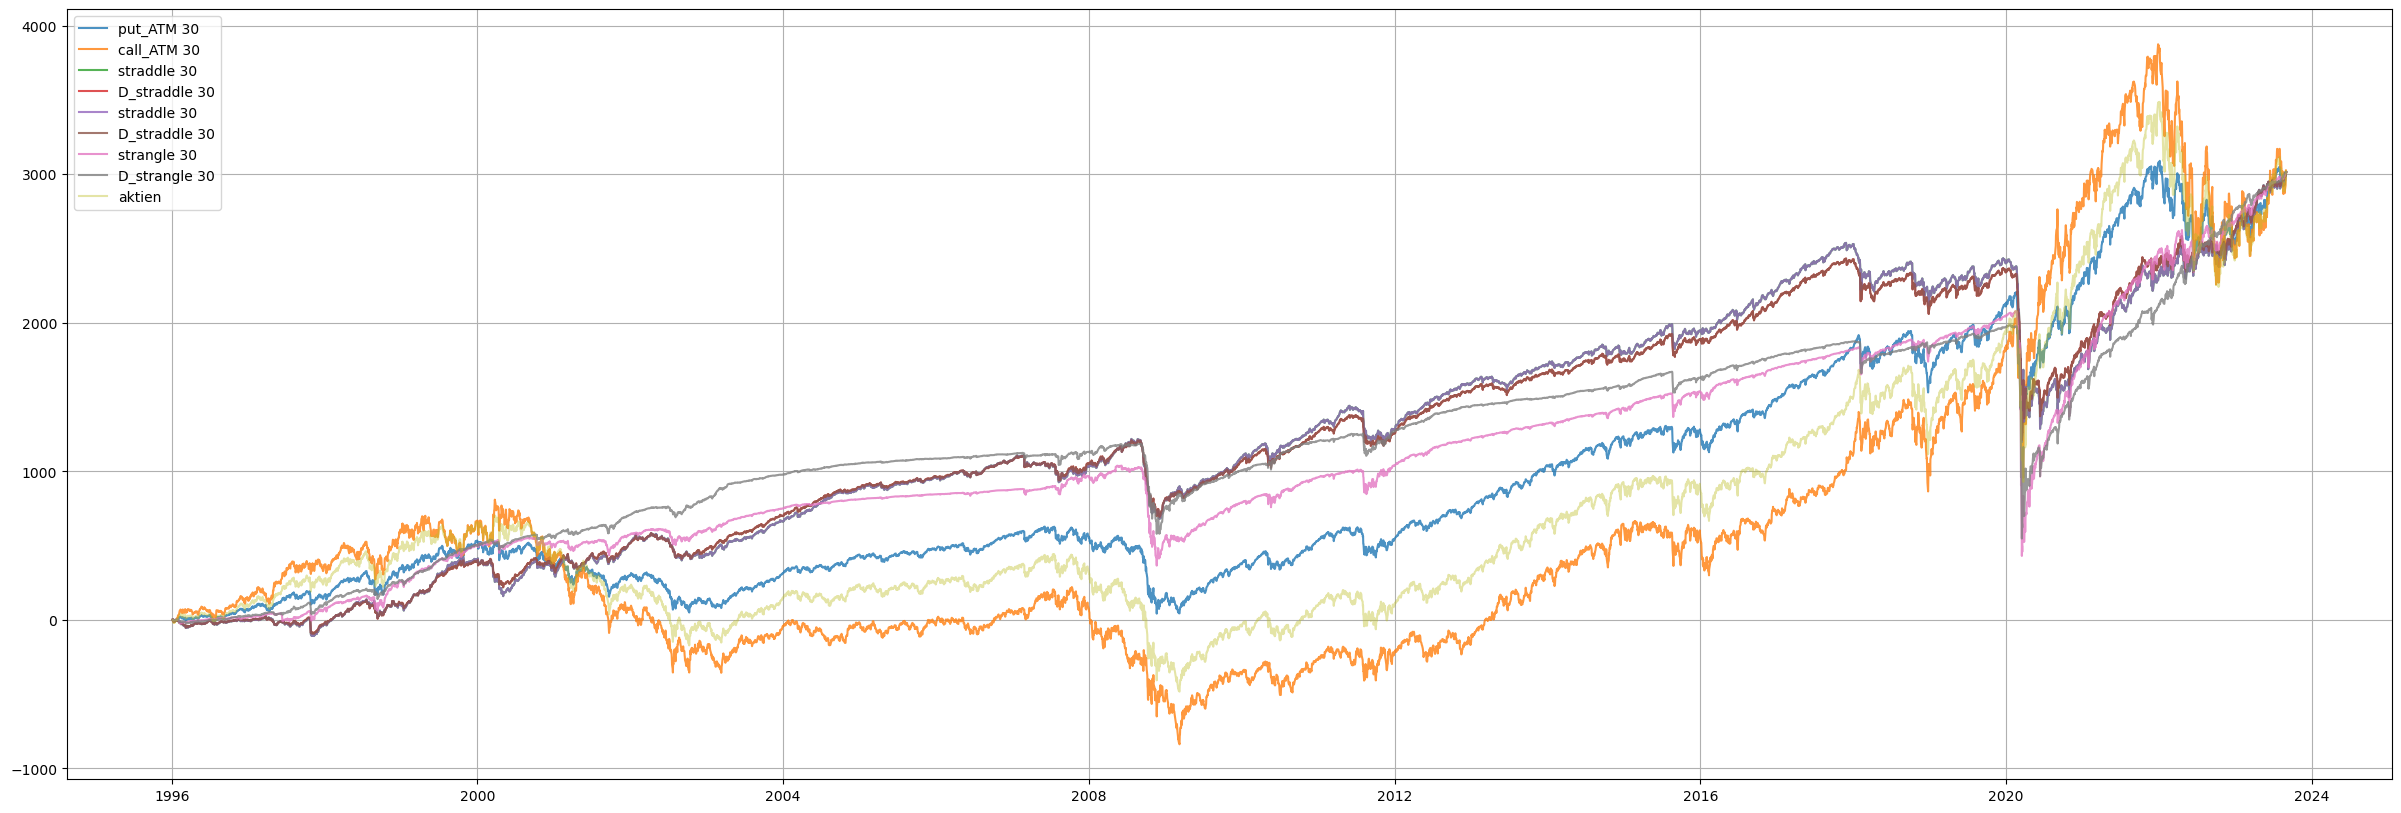

In [51]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["put_ATM", "call_ATM", "straddle", "D_straddle", "straddle", "D_straddle", "strangle", "D_strangle"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]),
         label=rf"{put_call} 30", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)

plt.grid()
plt.legend()
plt.show()

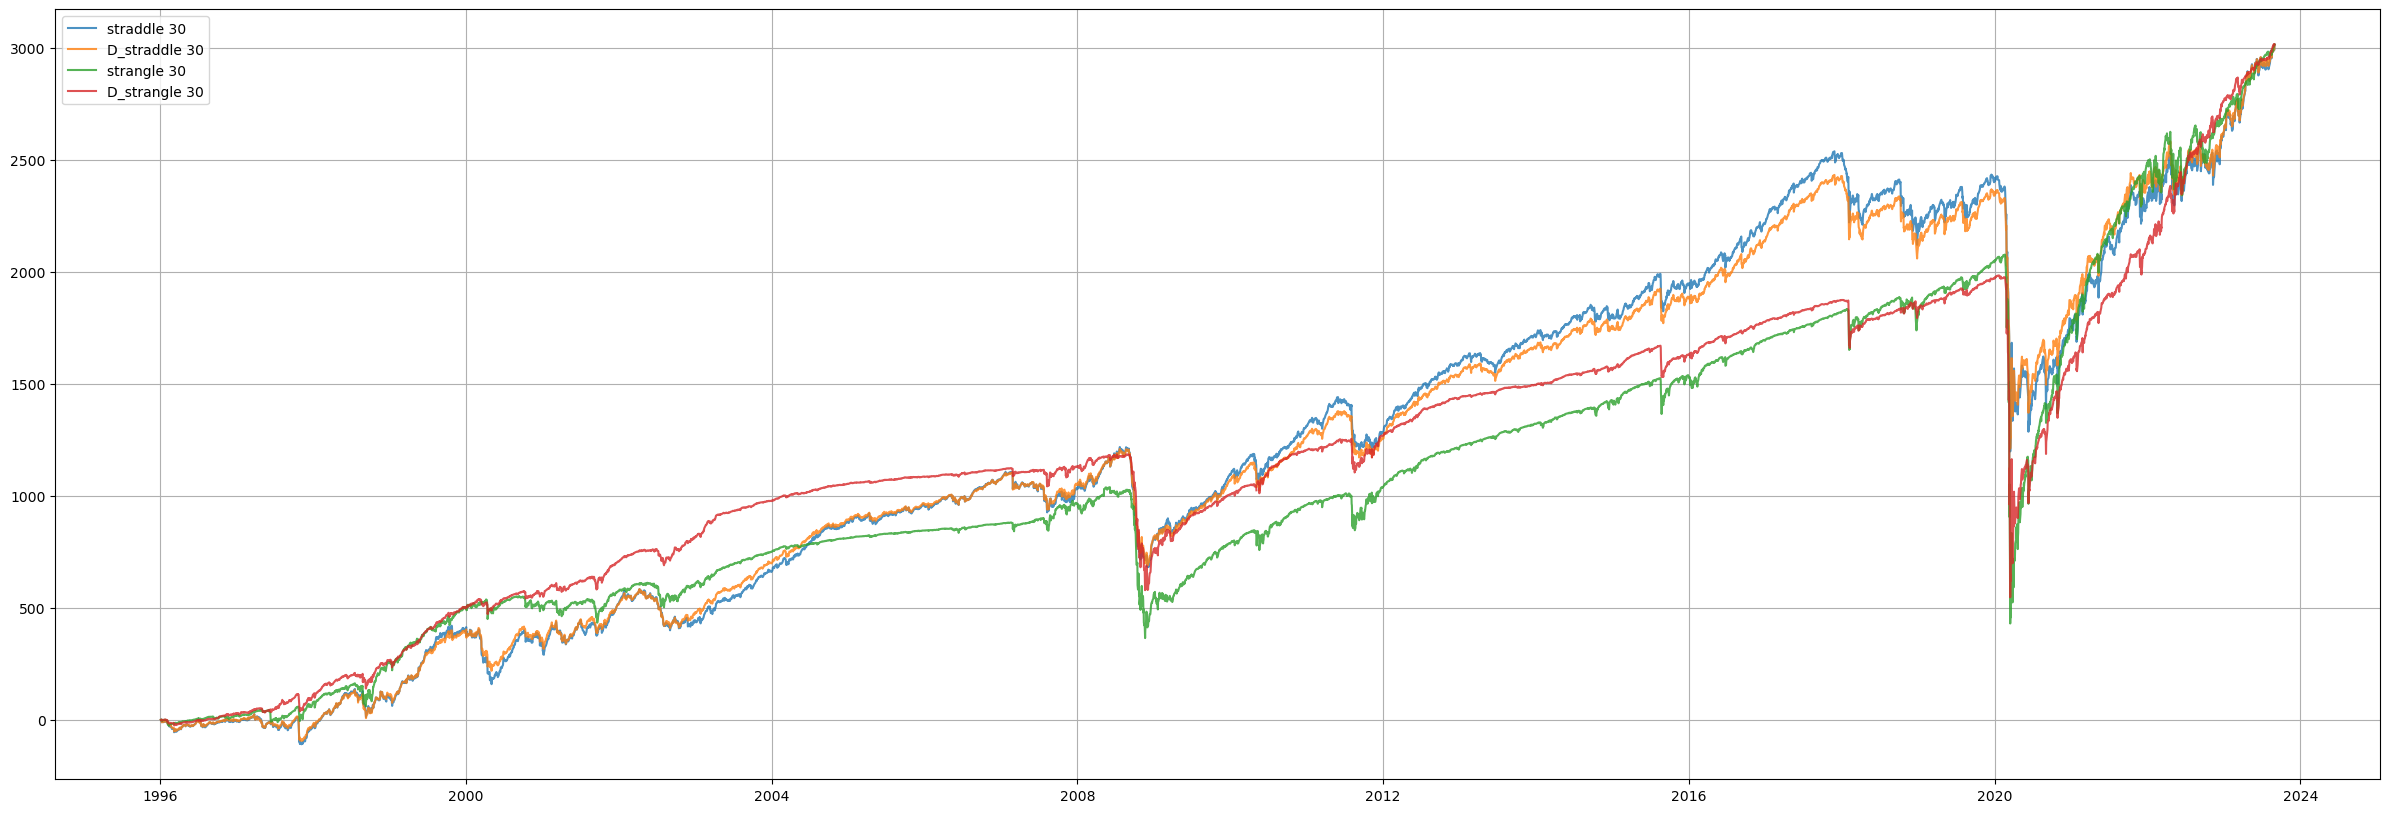

In [52]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["straddle", "D_straddle", "strangle", "D_strangle"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)


plt.grid()
plt.legend()
plt.show()

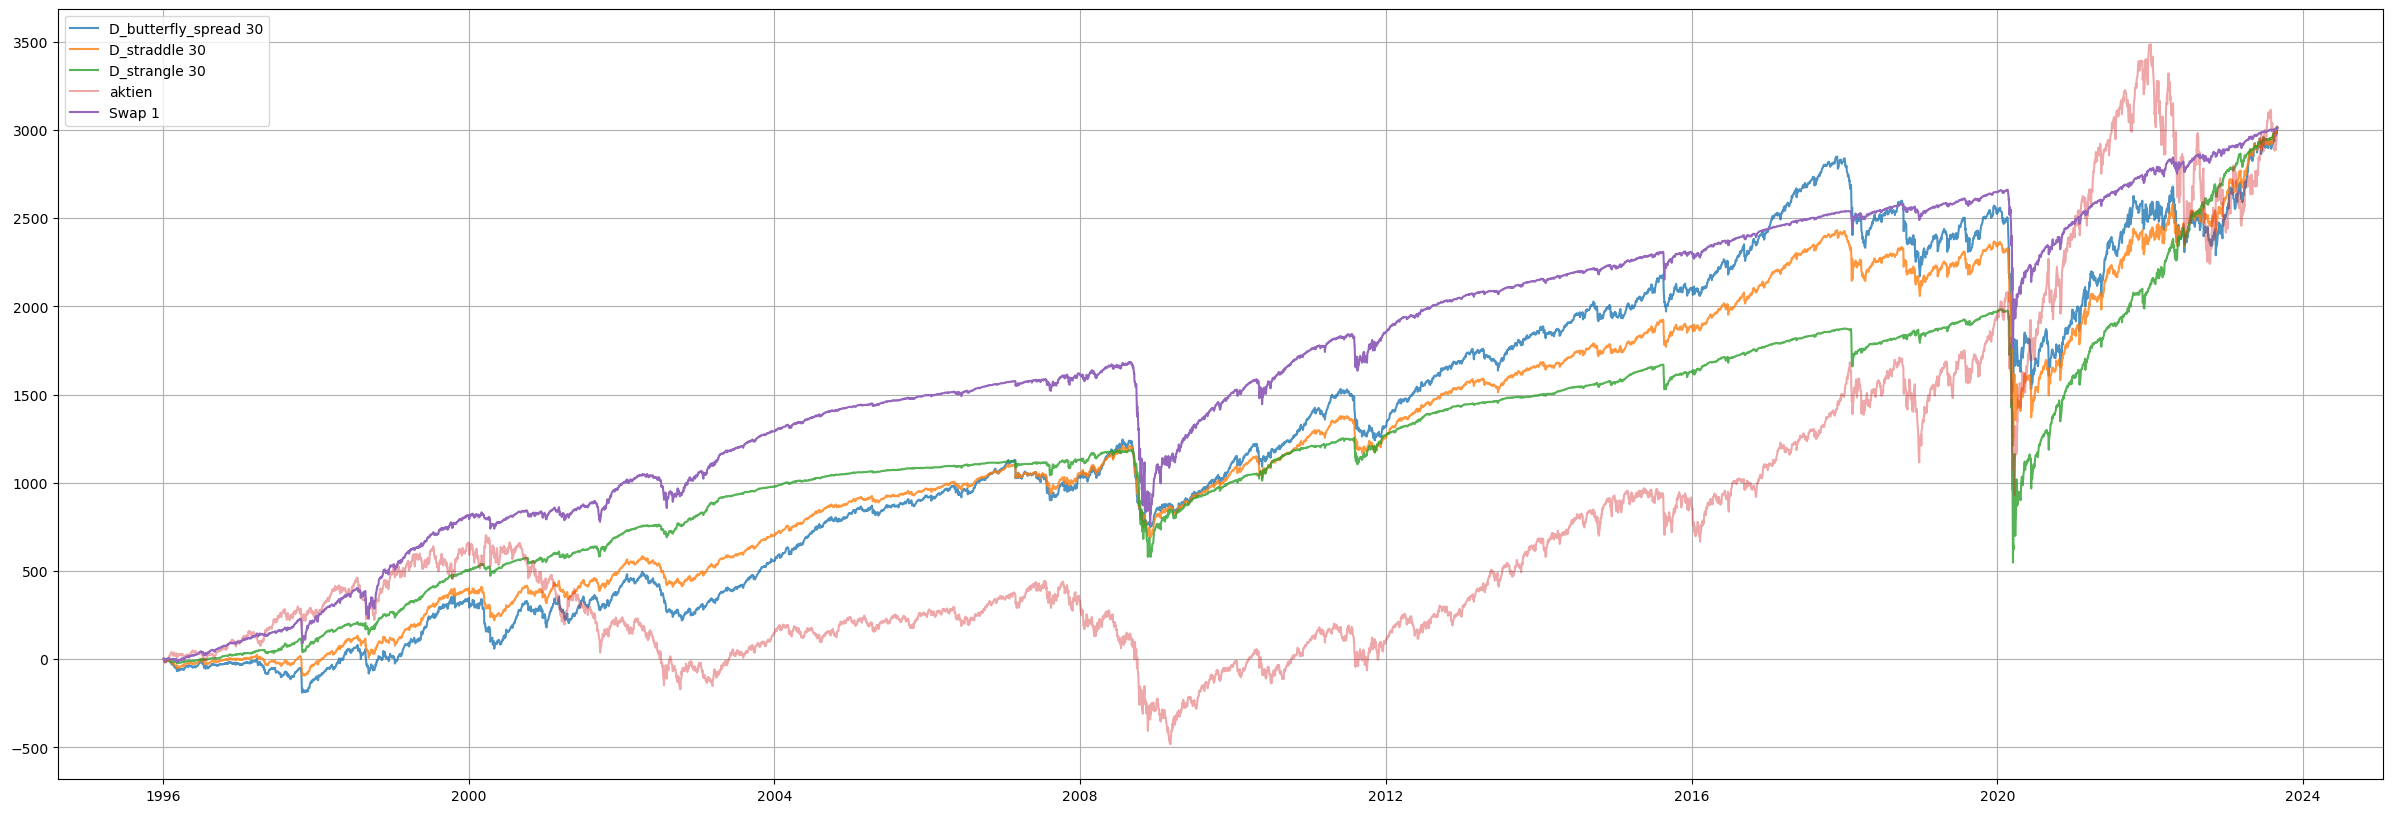

In [102]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["D_butterfly_spread", "D_straddle", "D_strangle"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)

x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap 1")


plt.grid()
plt.legend()
plt.show()

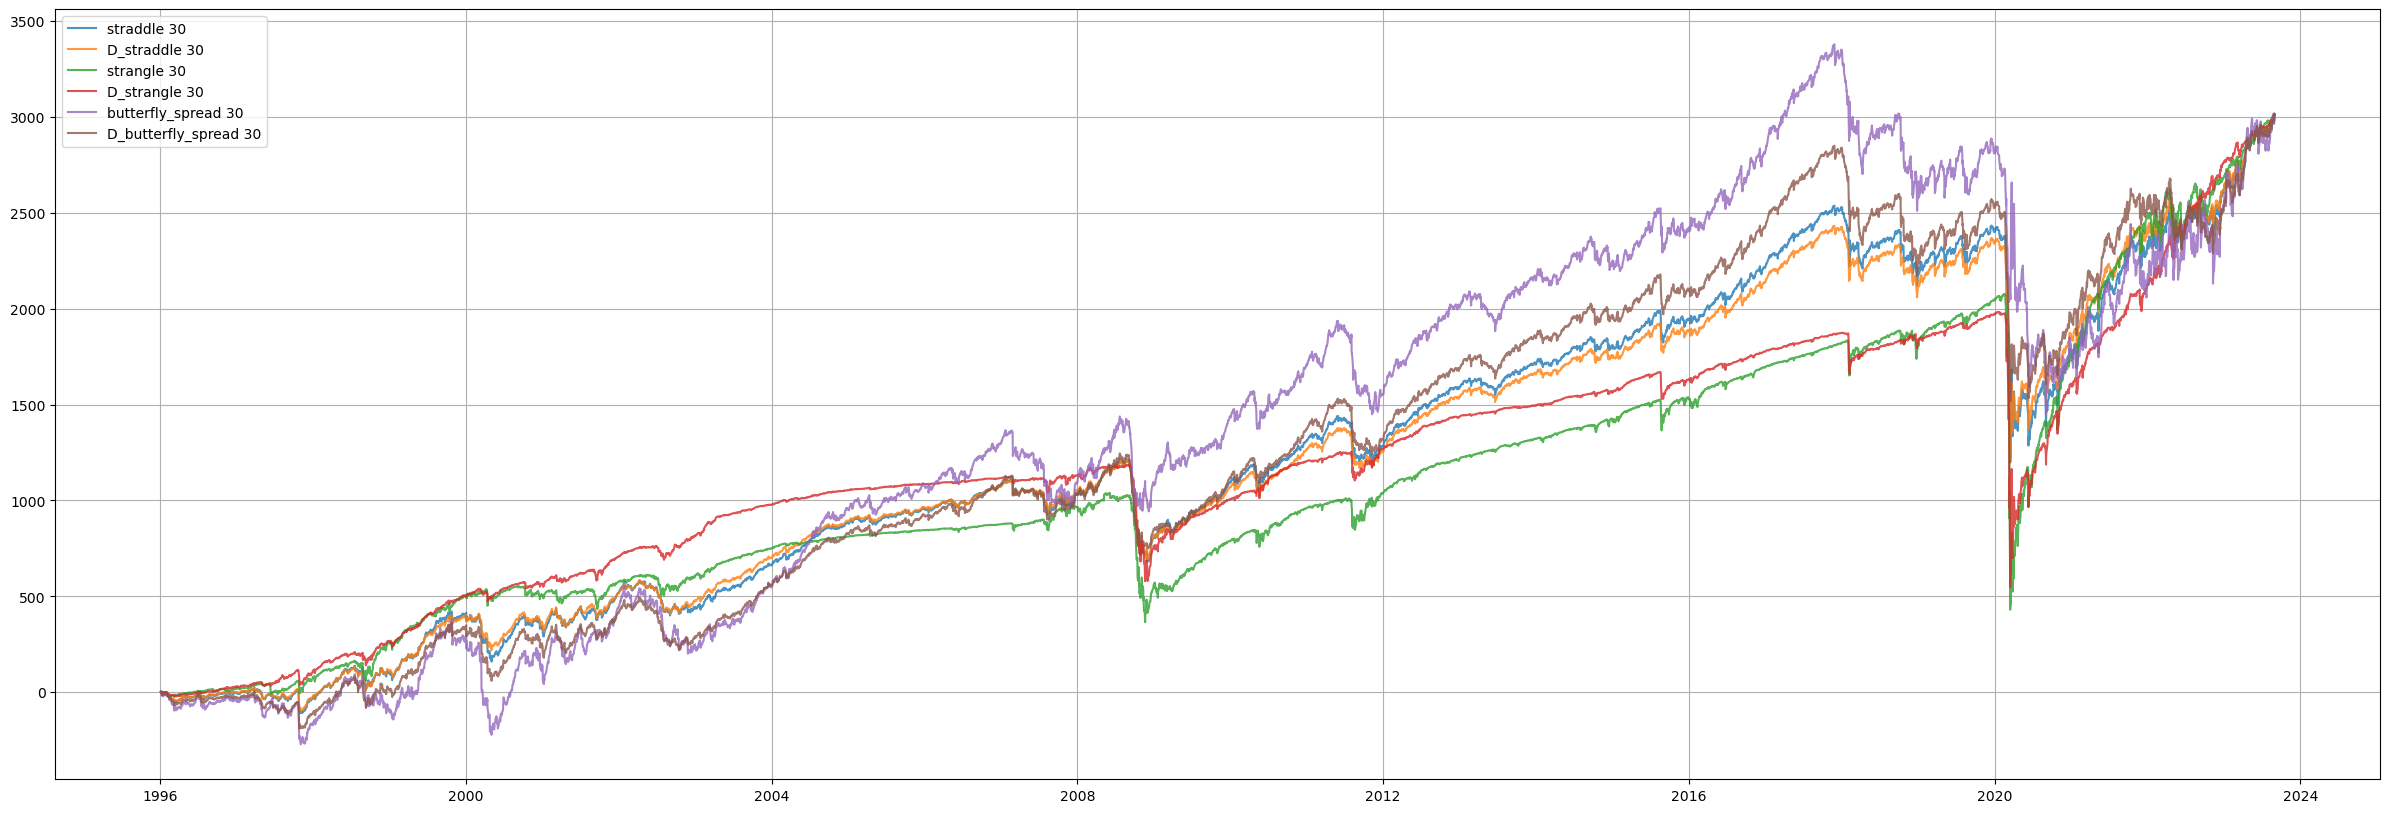

In [103]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["straddle", "D_straddle", "strangle", "D_strangle", "butterfly_spread", "D_butterfly_spread"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)

plt.grid()
plt.legend()
plt.show()

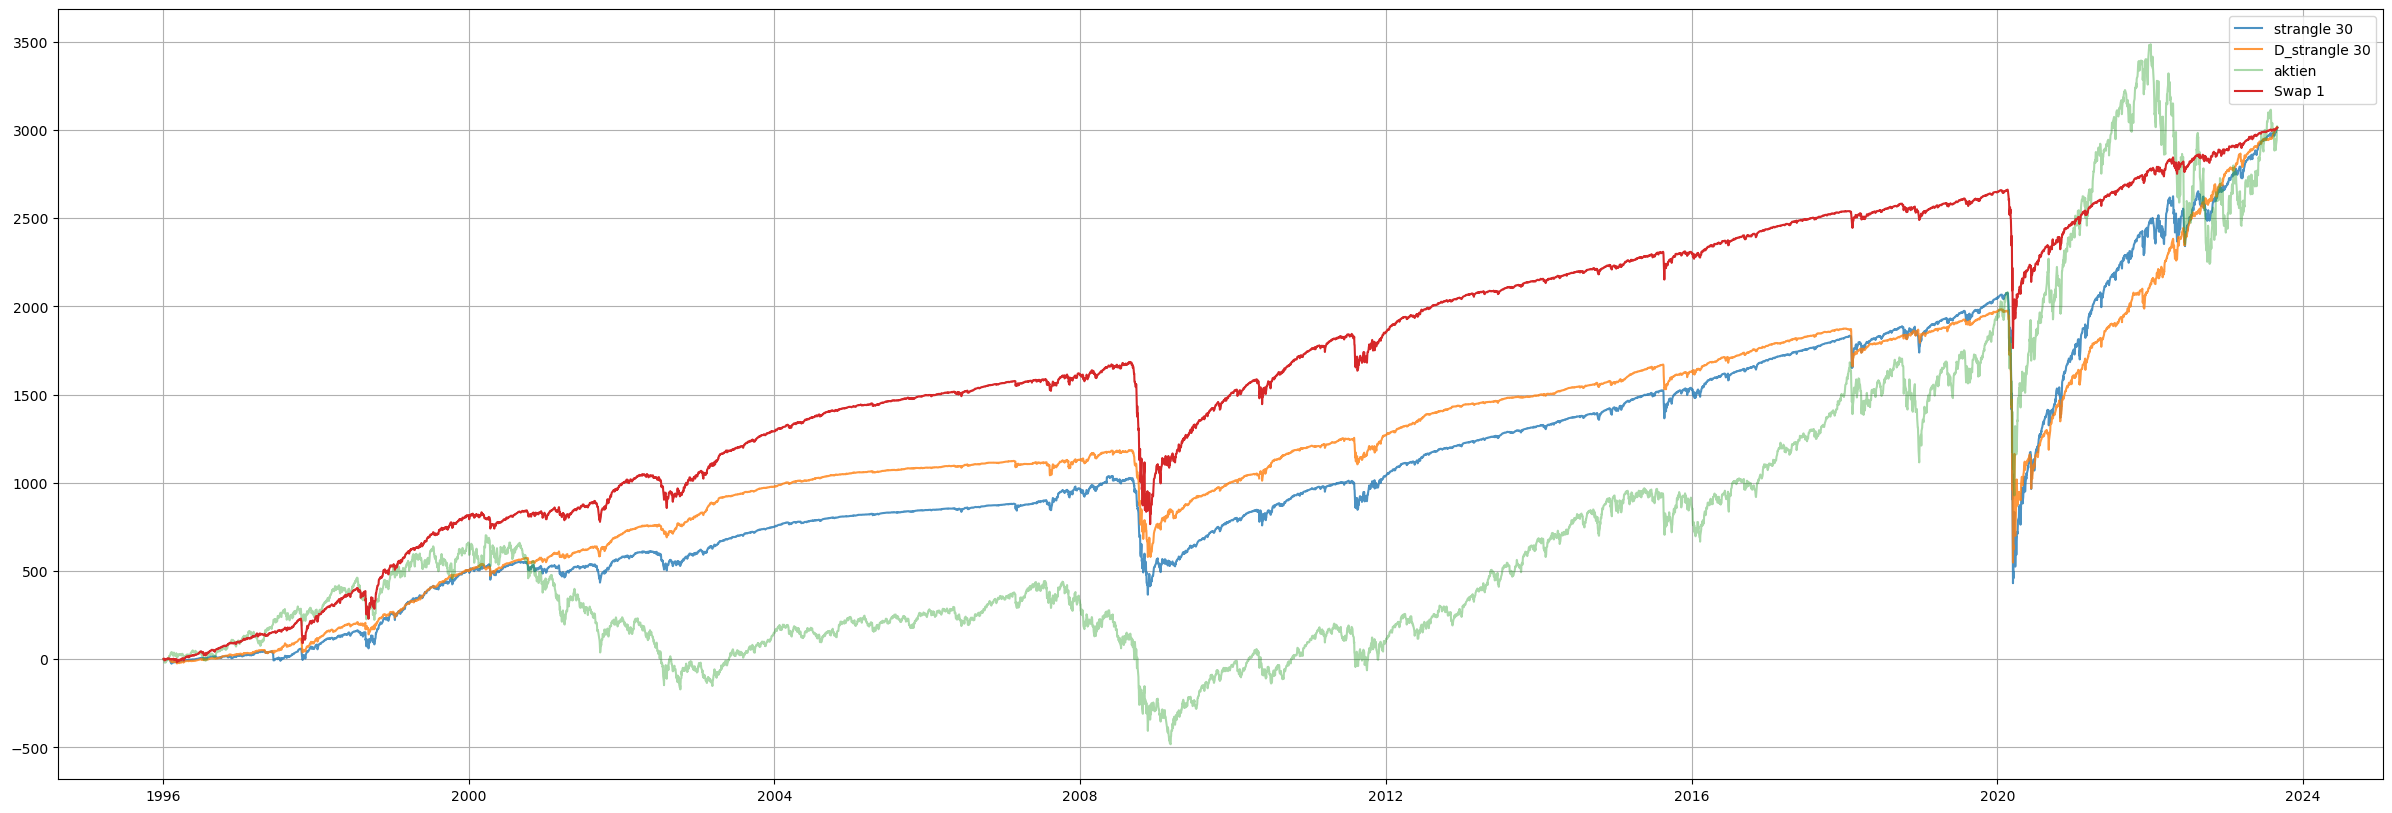

In [53]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["strangle", "D_strangle"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)


x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap 1")

plt.grid()
plt.legend()
plt.show()

# Plot accumulated cashflow

# Current front page for LaTeX

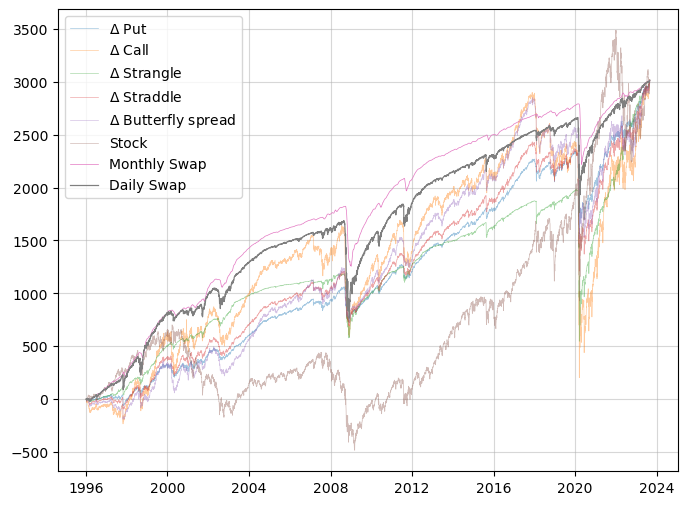

In [85]:
plt.figure(figsize=(8, 6))

lw = 0.5
last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
names = ["Put", "Call", "Strangle", "Straddle", "Butterfly spread"]
vars = ["30_put_D_ATM", "30_call_D_ATM", "30_D_strangle", "30_D_straddle", "30_D_butterfly_spread"]
    
for name, var in zip(names, vars):
    last_option_val = np.cumsum(df[var]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[var]),
         label=rf"$\Delta$ {name}", alpha=0.4, linewidth=lw)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="Stock", alpha=0.4, linewidth=lw)

# x_SW = df["SW_month"]
# last_val = np.cumsum(x_SW).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

x_SW_dly = df["SW_month"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Monthly Swap", linewidth=lw, alpha=1)

x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Daily Swap", linewidth=1.75*lw, alpha=1)


plt.grid(alpha=0.5)
plt.legend()
plt.savefig("figures/delta_acc fig.pdf")
plt.show()

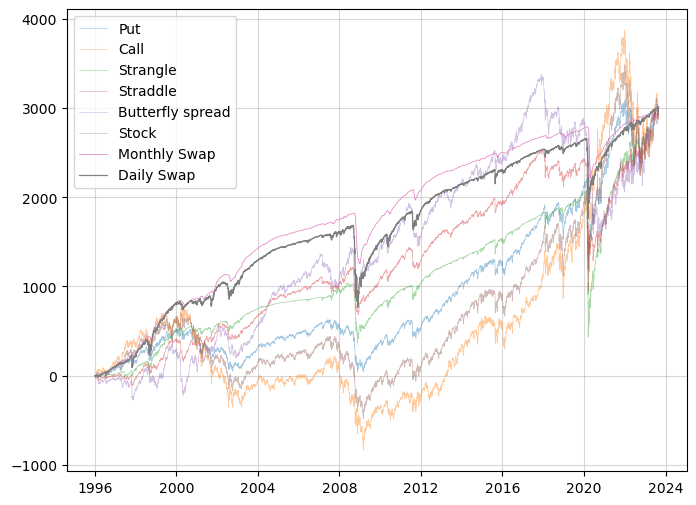

In [86]:
plt.figure(figsize=(8, 6))

lw = 0.5
last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
names = ["Put", "Call", "Strangle", "Straddle", "Butterfly spread"]
vars = ["30_put_ATM", "30_call_ATM", "30_strangle", "30_straddle", "30_butterfly_spread"]
    
for name, var in zip(names, vars):
    last_option_val = np.cumsum(df[var]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[var]),
         label=name, alpha=0.4, linewidth=lw)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="Stock", alpha=0.4, linewidth=lw)

# x_SW = df["SW_month"]
# last_val = np.cumsum(x_SW).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

x_SW_dly = df["SW_month"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Monthly Swap", linewidth=lw, alpha=1)

x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Daily Swap", linewidth=1.75*lw, alpha=1)

plt.grid(alpha=0.5)
plt.legend()
plt.savefig("figures/acc fig.pdf")
plt.show()

# Other

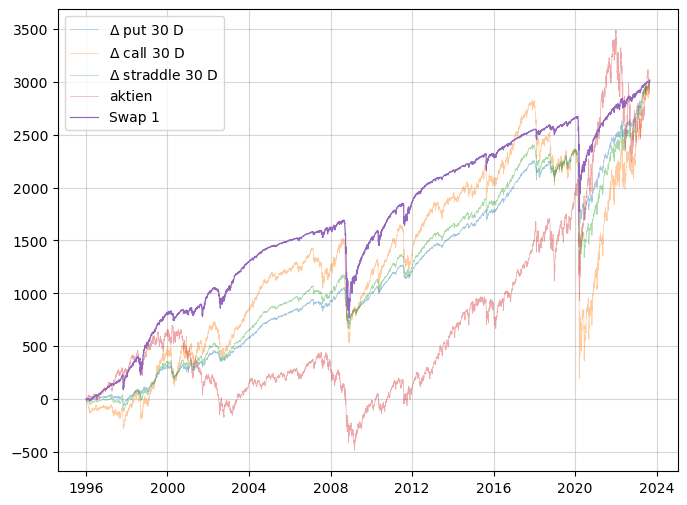

In [43]:
plt.figure(figsize=(8, 6))

lw = 0.5
last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["put", "call", "straddle"]:
    last_option_val = np.cumsum(df[f"30_D_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_D_{put_call}"]),
         label=rf"$\Delta$ {put_call} 30 D", alpha=0.4, linewidth=lw)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4, linewidth=lw)

# x_SW = df["SW_month"]
# last_val = np.cumsum(x_SW).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

df["SW_day_new"] = df["SW_day"]
x_SW_dly = df["SW_day_new"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap 1", linewidth=1.75*lw, alpha=1)

plt.grid(alpha=0.5)
plt.legend()
plt.savefig("figures/acc fig.pdf")
plt.show()

# Random Stuff from here

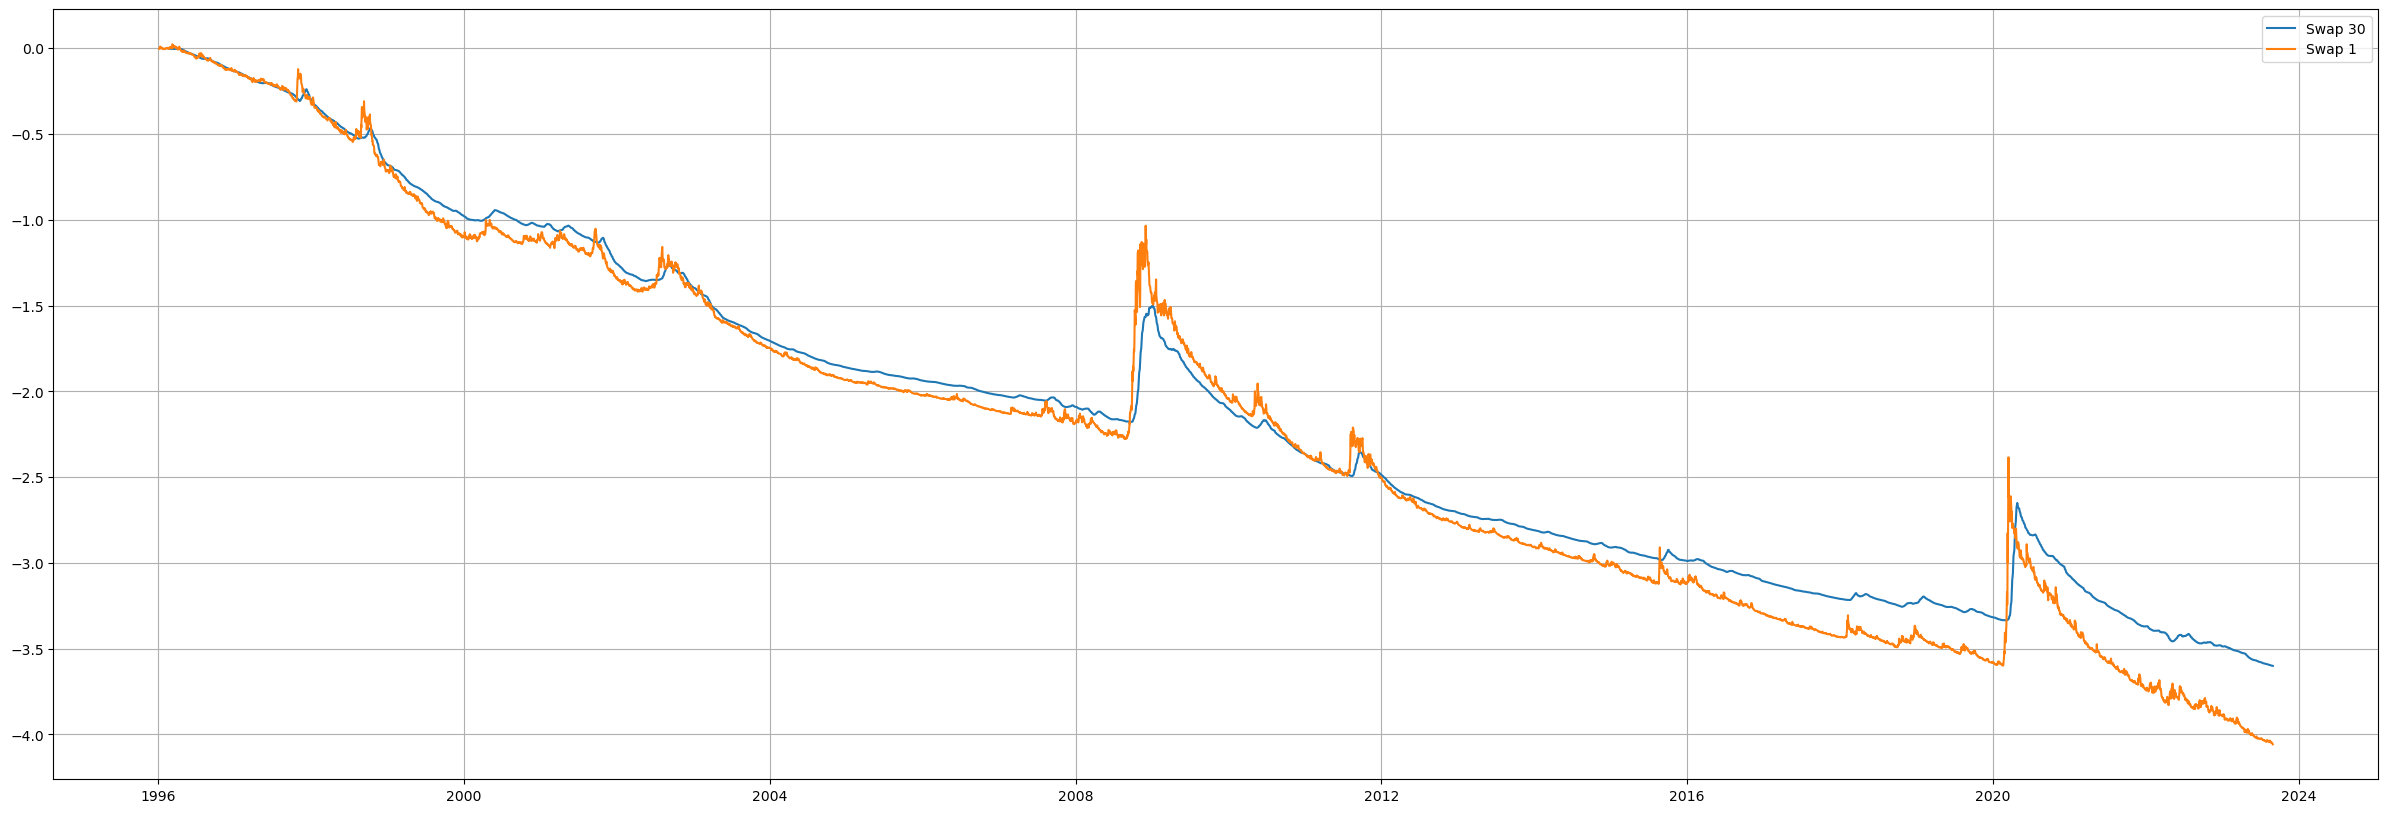

In [44]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
# for put_call in ["put", "call", "straddle"]:
#     plt.plot(df["date"], np.cumsum(df[f"30_D_{put_call}"]),
#          label=rf"$\Delta$ {put_call} 30 D", alpha=0.8)

# plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
#     label="aktien", alpha=0.4)

x_SW = df["SW_month"]
plt.plot(df["date"], np.cumsum(x_SW/21), label = "Swap 30")

df["SW_day_new"] = df["SW_day"]
x_SW_dly = df["SW_day_new"]
plt.plot(df["date"], np.cumsum(x_SW_dly), label = "Swap 1")

plt.grid()
plt.legend()
plt.show()

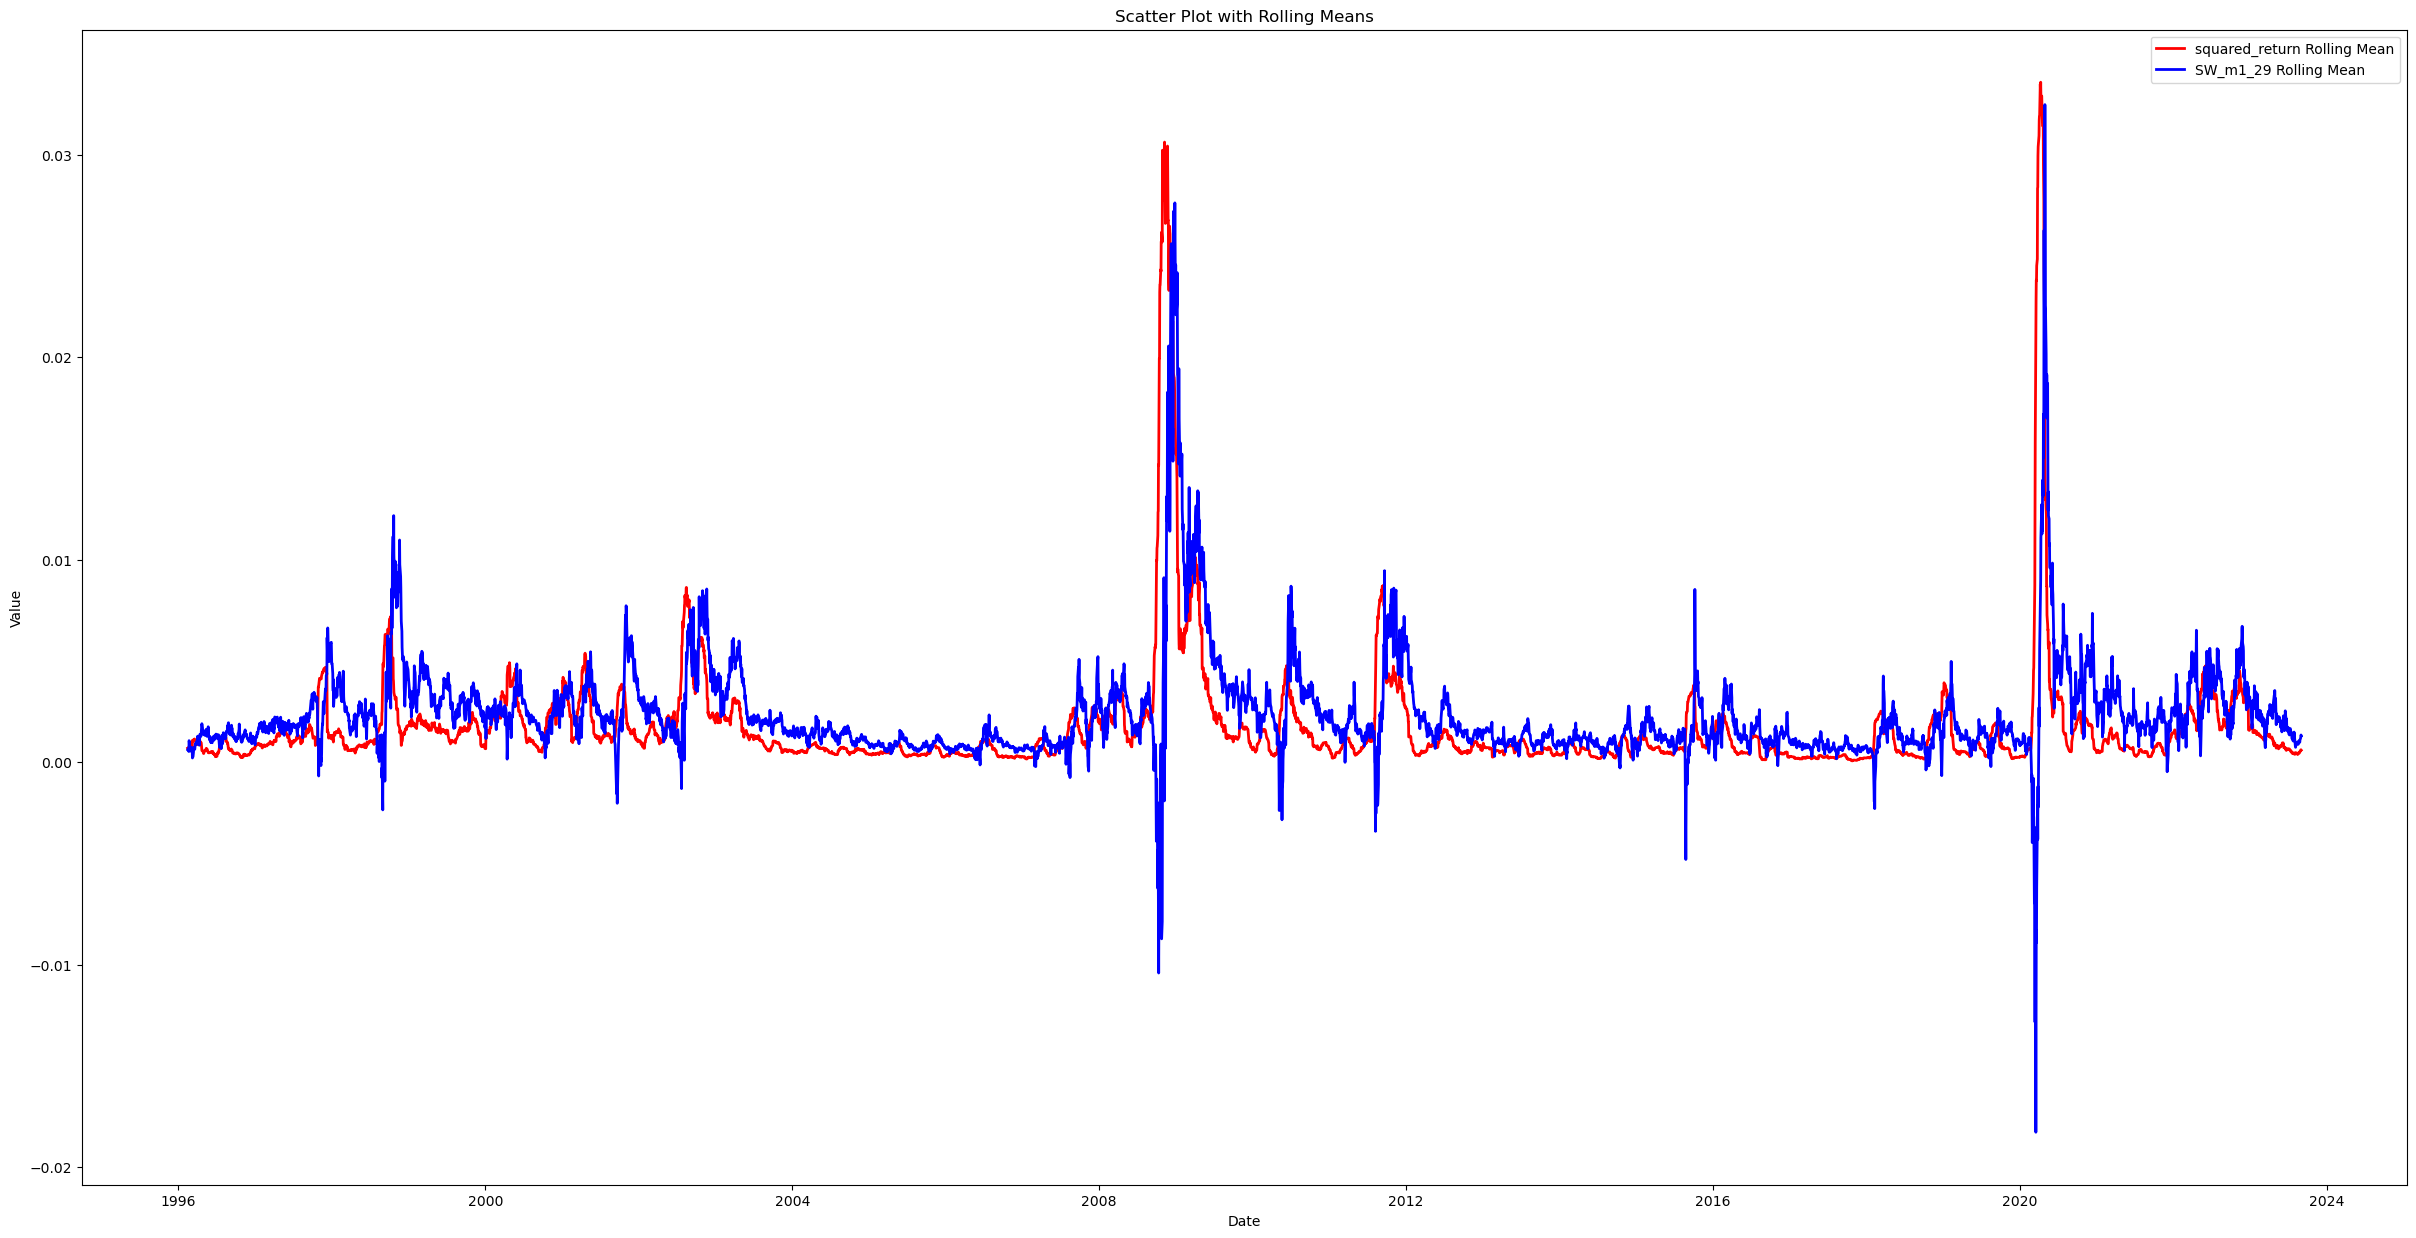

In [45]:
yr = df["date"].dt.year
df = df#[yr == 2020]

# Define the rolling window size (e.g., 20 days)
window_size = 30

# Compute the rolling mean for each series
df["squared_return_rolling"] = (252/21 * df["squared_return"]).rolling(window=window_size).mean()
df["SW_m1_rolling"] = (df["SW_m1_29"]-df["SW_0_29"]*20/21).rolling(window=window_size).mean()

# Create the plot
plt.figure(figsize=(30,15))

# # Scatter plots of the raw data
# plt.scatter(df["date"], 252 * df["squared_return"], label="squared_return", alpha=0.3)
# plt.scatter(df["date"], df["SW_m1_29"], label="SW_0_29", alpha=0.3)

# Line plots for the rolling means
plt.plot(df["date"], df["squared_return_rolling"], label="squared_return Rolling Mean", color="red", linewidth=2)
plt.plot(df["date"], df["SW_m1_rolling"], label="SW_m1_29 Rolling Mean", color="blue", linewidth=2)

# Adding labels and legend
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Scatter Plot with Rolling Means")
plt.legend()
plt.show()

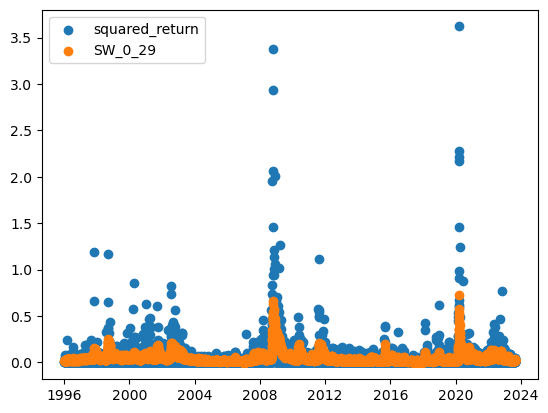

In [46]:
yr = df["date"].dt.year
df = df#[yr == 2020]
plt.scatter(df["date"], (252 * df["squared_return"]), label = "squared_return")
plt.scatter(df["date"], (df["SW_m1_29"]), label = "SW_0_29")
plt.legend()

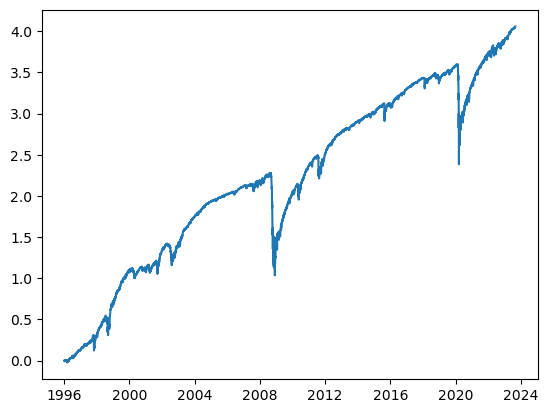

In [47]:
plt.plot(df["date"], np.cumsum(df["SW_m1_29"]-20/21*df["SW_0_29"]-252/21*df["squared_return"]), label = "SW_m1_29 - SW_0_29")

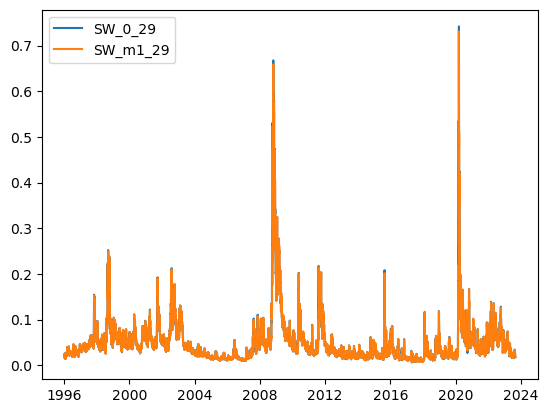

In [48]:
# plt.plot(df["date"], 252*df["squared_return"], label = "squared_return")
plt.plot(df["date"], df["SW_0_29"], label = "SW_0_29")
plt.plot(df["date"], df["SW_m1_29"], label = "SW_m1_29")
plt.legend()
plt.show()

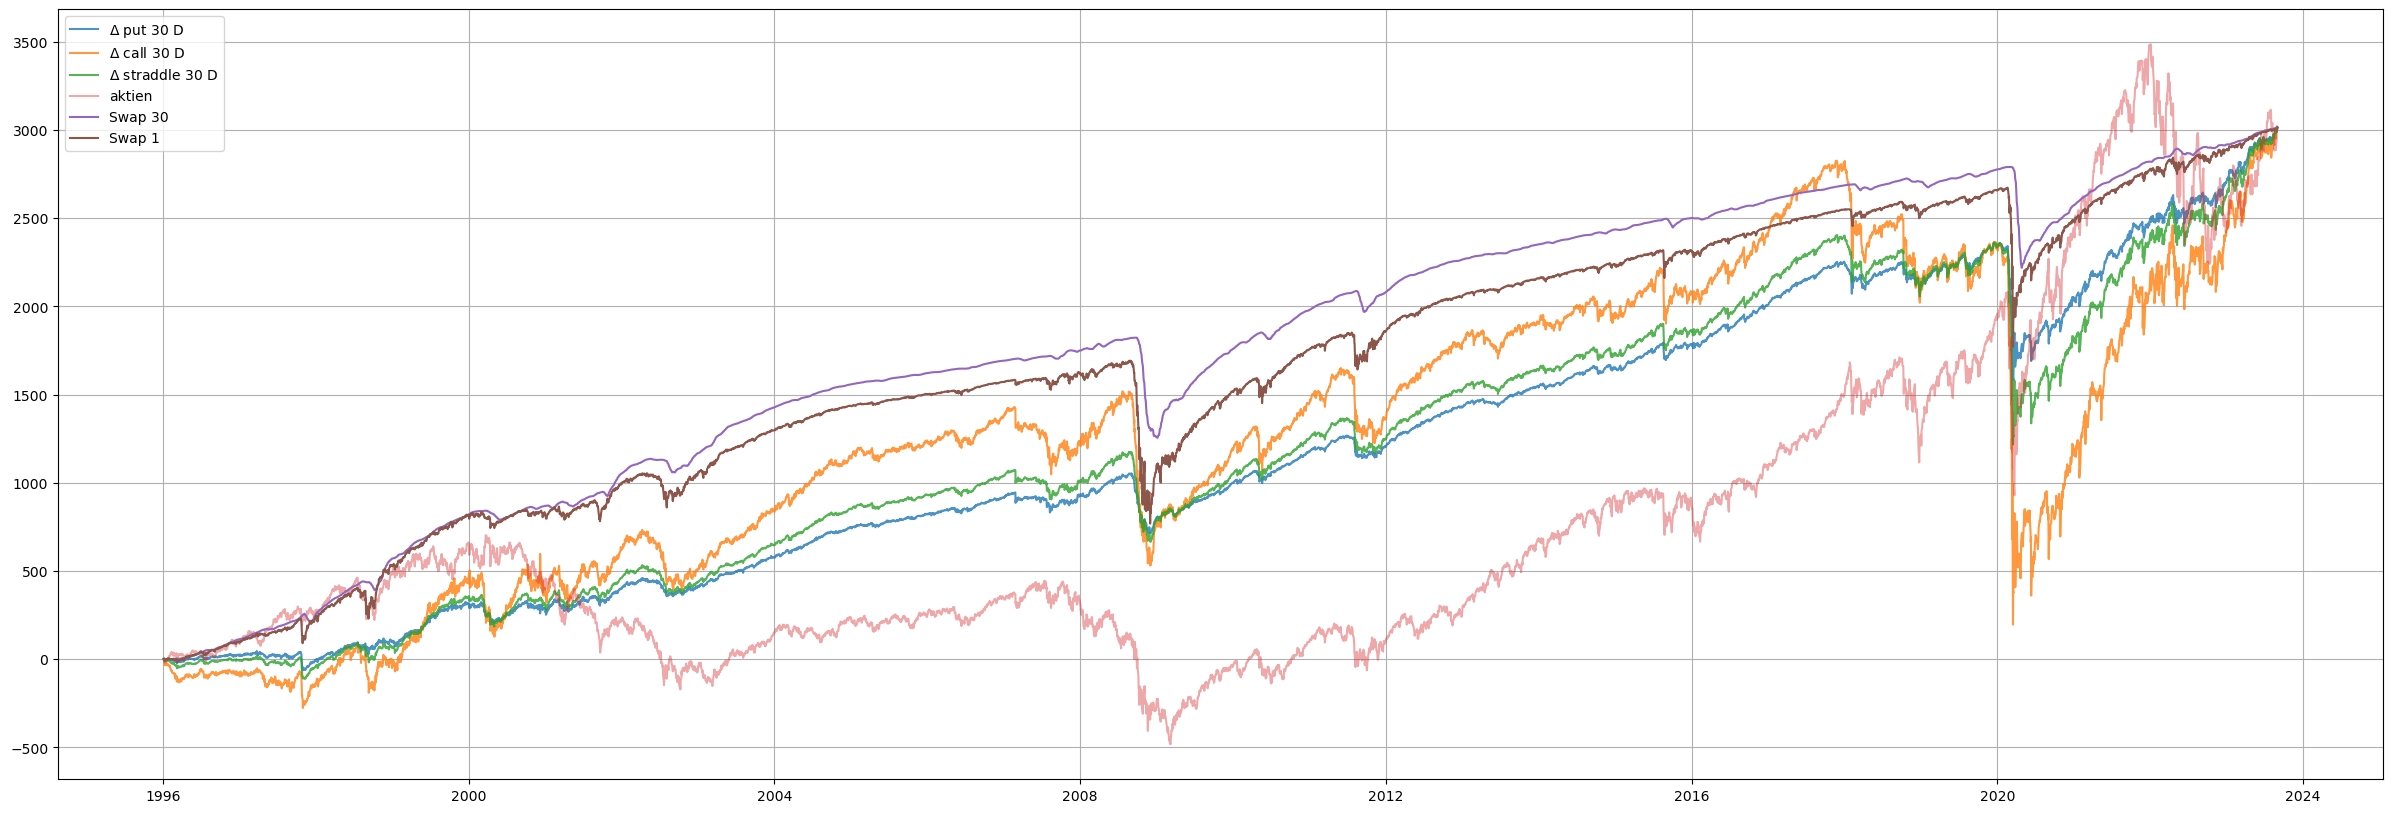

In [49]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["put", "call", "straddle"]:
    last_option_val = np.cumsum(df[f"30_D_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_D_{put_call}"]),
         label=rf"$\Delta$ {put_call} 30 D", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)

x_SW = df["SW_month"]
last_val = np.cumsum(x_SW).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

df["SW_day_new"] = df["SW_day"]
x_SW_dly = df["SW_day_new"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap 1")

plt.grid()
plt.legend()
plt.show()

# Other figures

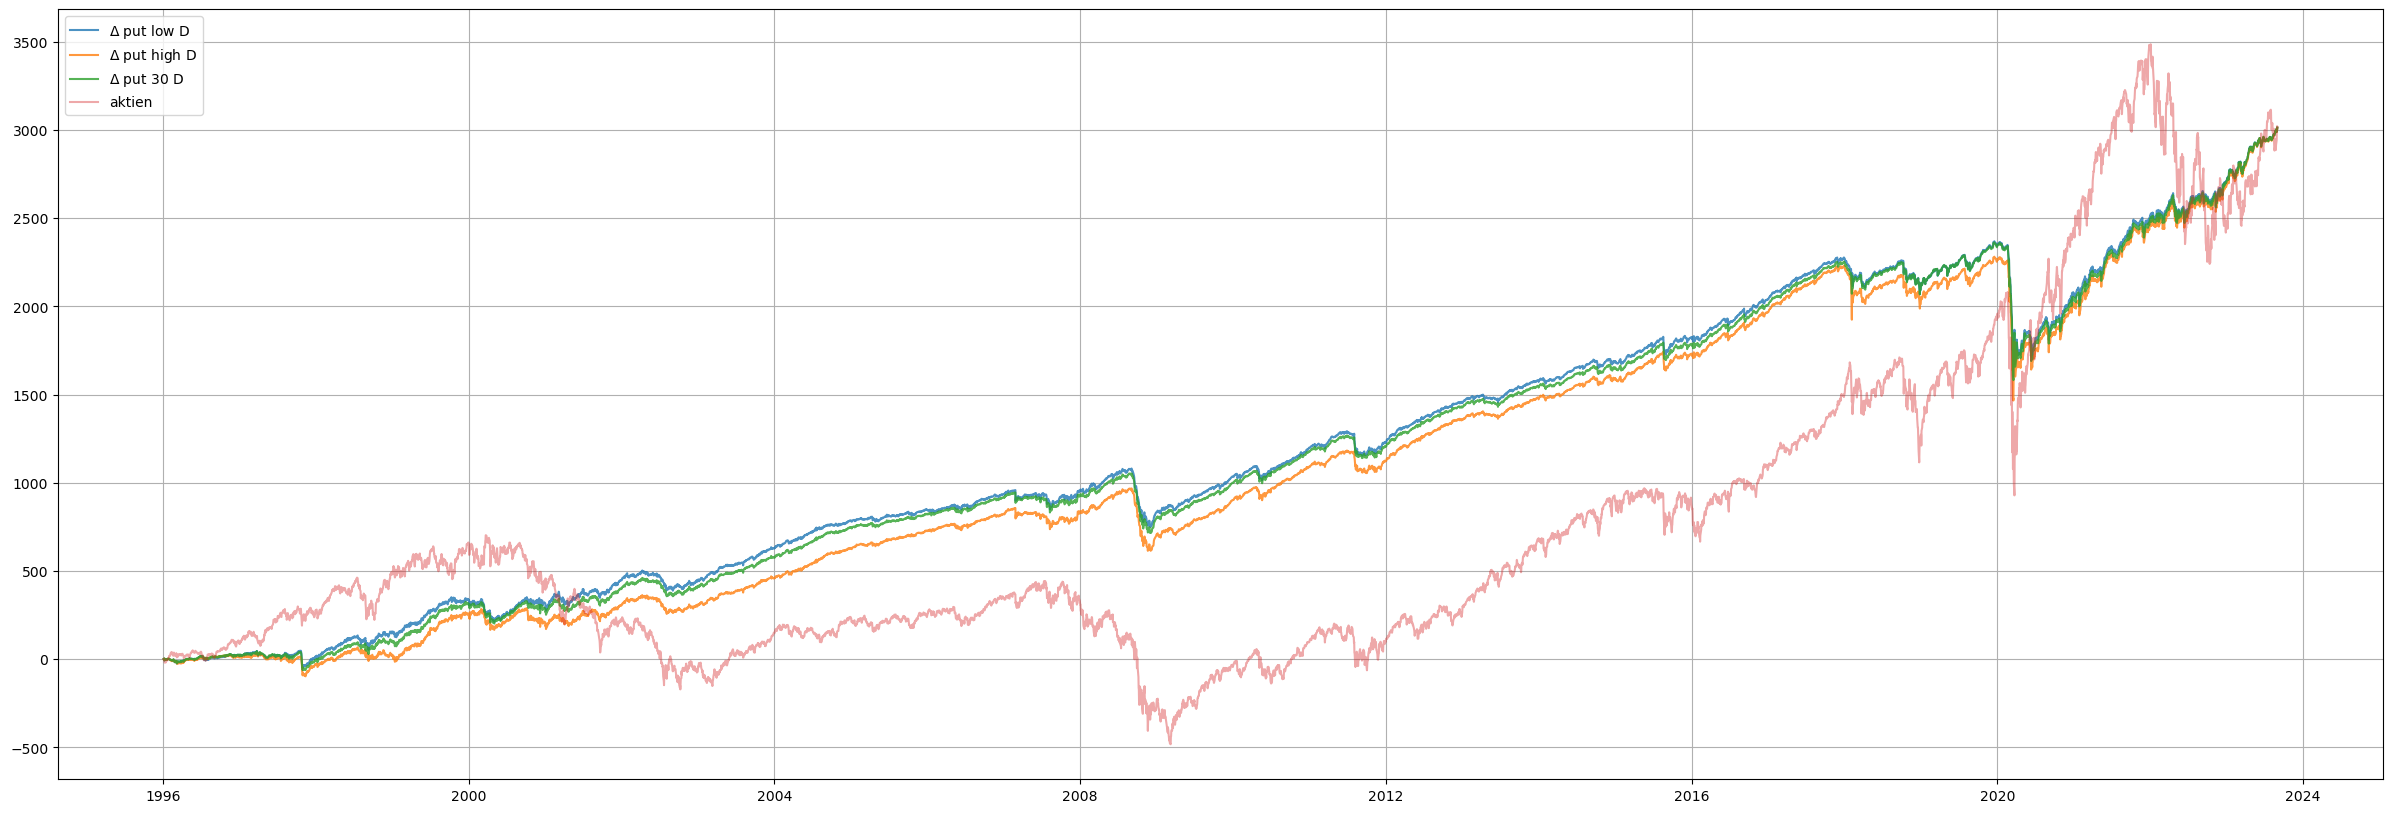

In [50]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]

put_call = "put"

for low_high in ["low", "high"]:
    last_option_val = np.cumsum(df[f"free_D_{low_high}_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"free_D_{low_high}_{put_call}"]),
         label=rf"$\Delta$ {put_call} " + low_high + " D", alpha=0.8)
    
last_option_val = np.cumsum(df[f"30_D_{put_call}"]).iloc[-1]
scalar = last_stock_val/last_option_val

plt.plot(df["date"], scalar * np.cumsum(df[f"30_D_{put_call}"]),
     label=rf"$\Delta$ {put_call} 30 D", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)

plt.grid()
plt.legend()
plt.show()